# Coursera: The Capstone project

This notebook will be used for the Capstone project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import pickle
%matplotlib inline

In [2]:
pd.options.display.max_columns = None

Datas were downloaded from the City website : https://data.seattle.gov/Land-Base/Collisions/9kas-rb8d

In [3]:
df=pd.read_csv('Collisions.csv')

In [4]:
df.shape

(221266, 40)

In [5]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [6]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1.256925e+06,209863.662731,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2019/11/20 00:00:00+00,11/20/2019 10:25:00 AM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,1.268898e+06,254213.515448,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,,NaN,2,Injury Collision,Angles,4,0,0,2,2,0,0,2019/11/18 00:00:00+00,11/18/2019 5:01:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,1.260615e+06,247712.956786,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,,NaN,1,Property Damage Only Collision,Sideswipe,4,0,0,3,0,0,0,2020/02/20 00:00:00+00,2/20/2020 8:42:00 AM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,1.278979e+06,252600.696759,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,NaN,NaN,1,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,2004/06/08 00:00:00+00,6/8/2004,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,1.275139e+06,210424.142220,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/10/15 00:00:00+00,10/15/2004,Mid-Block (but intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [7]:
df.drop(columns=['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SDOTCOLNUM'], inplace=True)

In [8]:
def annee(x):
    return int(x[:4])
    
Date=df['INCDATE'].apply(annee)

a=df.loc[Date!=2020,'PERSONCOUNT'].sum()/16/365*7
b=df.loc[Date!=2020,'SERIOUSINJURIES'].sum()/16/365*7 \
    +df.loc[Date!=2020,'FATALITIES'].sum()/16/365*7

print('The average number of people weekly involved in a collision and the number of weekly serious injuries or deaths are: \n{} and {}.'.format(int(a),int(b)))


The average number of people weekly involved in a collision and the number of weekly serious injuries or deaths are: 
579 and 4.


## Exploring the target data (`SEVERITYCODE`)

In [9]:
df['SEVERITYCODE'].describe()

count     221265
unique         5
top            1
freq      137485
Name: SEVERITYCODE, dtype: object

### `NaN` data and `0` values data

1. `NaN` data

In [10]:
df['SEVERITYCODE'].isna().value_counts()

False    221265
True          1
Name: SEVERITYCODE, dtype: int64

In [11]:
df.loc[df['SEVERITYCODE'].isna(), ['SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE']]

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE
196614,NaN,Unknown,NaN


Since the instance cannot be labelled, we drop it.

In [12]:
df.dropna(subset=['SEVERITYCODE'], inplace=True)

In [13]:
df.shape

(221265, 33)

2. `0` values

In [14]:
df['SEVERITYCODE'].value_counts()

1     137485
2      58698
0      21635
2b      3098
3        349
Name: SEVERITYCODE, dtype: int64

In [15]:
df.loc[df['SEVERITYCODE']=='0',['SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE']].value_counts()

SEVERITYCODE  SEVERITYDESC  COLLISIONTYPE
0             Unknown       Pedestrian       1
                            Angles           1
dtype: int64

Since the instances cannot be labelled, we drop them.

In [16]:
df.drop(index=df[df['SEVERITYCODE']=='0'].index, inplace=True)

In [17]:
df.shape

(199630, 33)

### Vizualizing the target datas

<AxesSubplot:>

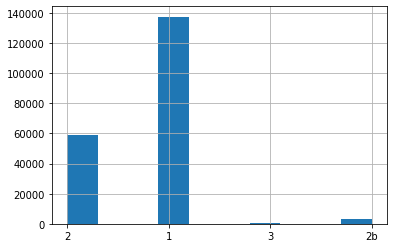

In [18]:
df['SEVERITYCODE'].hist()

In [19]:
df[['SEVERITYCODE', 'SEVERITYDESC']].value_counts()/199630

SEVERITYCODE  SEVERITYDESC                  
1             Property Damage Only Collision    0.688699
2             Injury Collision                  0.294034
2b            Serious Injury Collision          0.015519
3             Fatality Collision                0.001748
dtype: float64

We only need the `SEVERITYCODE`feature since `SEVERITYDESC` is exactly the same.

In [20]:
df_y=df['SEVERITYCODE']
df_X=df.drop(columns=['SEVERITYCODE', 'SEVERITYDESC'])

## Spliting the data into a train and a test set

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=19)

for train, test in sss.split(df_X.values, df_y.values):
    train_index=train
    test_index=test

In [23]:
df_train_neat=df.iloc[train_index]
df_test=df.iloc[test_index]

## Data visualization

In [24]:
df_train=df_train_neat.copy()
df_train.reset_index(inplace=True)
df_train.drop(columns=['index'], inplace=True)
colors=[(1,0.9,0,0.4), (1,0.65,0,0.4), (1,0.4,0,0.6), (1,0.1,0,0.8)]

In [25]:
df_train['all_data']=[1 for i in range(len(df_train['SEVERITYCODE']))]

In [26]:
df_train.shape

(159704, 34)

In [27]:
df_train.describe()

,X,Y,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY,all_data
count,1.553780e+05,155378.000000,53974.000000,159704.000000,159704.000000,159704.000000,159704.000000,159704.000000,159704.000000,159704.000000,159704.000000,159704.000000,1.597040e+05,159704.0
mean,1.271198e+06,229574.974116,37630.702653,2.447747,0.042447,0.030231,1.915268,0.414529,0.016850,0.001885,13.981096,283.435330,1.063834e+04,1.0
std,7.349104e+03,20546.560442,51970.056869,1.376005,0.212377,0.172570,0.638673,0.765283,0.172853,0.047901,6.983146,3303.543407,7.544242e+04,0.0
min,1.249026e+06,184059.089009,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.0
25%,1.266778e+06,213565.004431,28666.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000e+00,1.0
50%,1.271167e+06,228076.074654,29983.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000e+00,1.0
75%,1.276056e+06,245760.881072,33992.500000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,0.000000,0.000000e+00,1.0
max,1.293052e+06,271525.414794,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,69.000000,525241.000000,5.239700e+06,1.0


In [28]:
df_train.describe(include='object')

,STATUS,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,159704,158151,157543,159704,159704,155774,159704,159704,154619,159704,24128,155790,155616,155693,155565,4149,7943,159690,155774,159704
unique,2,3,22731,4,4,10,6078,134280,7,39,1,4,11,9,9,1,1,63,62,2
top,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,1,Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,155787,103569,231,109988,109988,38651,79,79,73502,69478,24128,82745,91329,102400,95359,4149,7943,35772,35772,153687


### Different functions used afterward

In [29]:
def histo_presentation(df, col_histo, col_data, colors=None, x_labels=None, x_weights=None, y_labels=('',None),\
                       title='', with_na=False, with_density=False, y_max=None,\
                       ncol=2, wcol=7, wrow=3, with_return=True):
    
    labels=list(df[col_data].unique())
    try:
        labels.remove(np.nan)
    except:
        pass
    labels=sorted(labels)
    
    histos=list(df[col_histo].unique())
    if not with_na:
        try:
            histos.remove(np.nan)
        except:
            pass
        histos=sorted(histos)
    
    if x_labels is None:
        x_labels=labels
    
    if colors is None:
        colors=['C0' for i in range(len(histos))]
        
    if type(y_labels) is str:
        y_labels=y_labels, lambda x: x

    
    nbhistos=len(histos)
    nrow=nbhistos//ncol + 1*(nbhistos%ncol!=0)
    fig, axs = plt.subplots(nrow, ncol, figsize=(wcol*ncol, wrow*nrow))
    if ncol==1:
        axs=np.array([axs])
    axs=axs.flatten()
    
    for i,code in enumerate(histos):
        
        if x_weights is None:
            W=None
        else:
            w=np.sum(x_weights)/np.array(x_weights)
            W=[w[el-1] for el in df.loc[(df[col_histo]==code) & (~df[col_data].isna()), col_data]]
        
        df.loc[(df[col_histo]==code) & (~df[col_data].isna()), col_data].replace(to_replace=labels,\
                    value=[j+1 for j in range(len(labels))]).plot(kind='hist',\
                            bins=[j+1 for j in range(len(labels)+1)], ax=axs[i], color=colors[i],\
                                        density=with_density, edgecolor='white', weights=W)
        xticksT=[]
        for p in axs[i].patches:
            xticksT.append(p.xy[0]+p.get_width()/2)
        axs[i].set_xticks(xticksT)
        axs[i].set_xticklabels(x_labels)
        axs[i].set_ylabel(y_labels[0].format(y_labels[1](code)))
        axs[i].grid(axis='y')
        if y_max is not None:
            axs[i].set_ylim((0,y_max))
    
    fig.suptitle(title, fontsize=16)
    
    if with_return:
        return labels

In [30]:
def missing_value_rate(df, target, value_col):
    df1=df[[value_col]].isna().join(df[target]).rename(columns={value_col:'Nb of missing values for {}'.format(value_col)}).groupby(target).sum()
    df2=df[target].value_counts().to_frame()
    df1['Rate of missing values for {}'.format(value_col)]=df1['Nb of missing values for {}'.format(value_col)]/df2[target]
    df1['Rate of missing values for {}'.format(value_col)]=df1['Rate of missing values for {}'.format(value_col)].apply(lambda x: '{}%'.format(round(x*100, 2)))
    return df1

In [31]:
def is_uniform(s, alpha=0.05):
    J=len(s)
    N=s.sum()
    ddl=J-1
    T=0
    for v in s:
        T+=(v-N/J)**2/v
    Tchi=stats.chi2.ppf(1-alpha, ddl)
    return T<Tchi

In [32]:
def has_same_repartition(a, b, alpha=0.05):
    s0=a.copy()
    s1=b.copy()
    s=s0.rename('s0').to_frame().join(s1.rename('s1'))
    
    J=len(s['s0'])
    ddl=J-1
    N0, N1 = s['s0'].sum(), s['s1'].sum()
    T=0
    for n0, n1 in zip(s['s0'], s['s1']):
        T+=(n1-n0*N1/N0)**2/(n0*N1/N0)
    Tchi=stats.chi2.ppf(1-alpha, ddl)
    return T<Tchi

In [33]:
def matrix_same_repartition(df, feature, column='SEVERITYCODE', alpha=0.05):
    labels=df[column].unique()
    M=[[has_same_repartition(
        df.loc[df[column]==l0, feature].value_counts(),
        df.loc[df[column]==l1, feature].value_counts(),
        alpha=alpha
    ) for l0 in labels] for l1 in labels]
    dfreturn=pd.DataFrame(data=M, index=['{} has same rep. as'.format(l) for l in labels], columns=labels)
    return dfreturn

### Geolocalization (features `X` and `Y`)

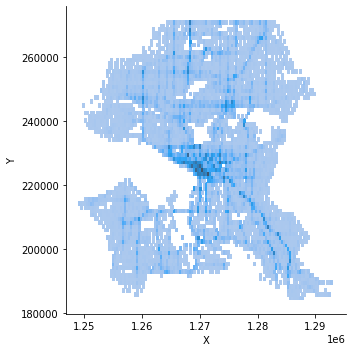

In [34]:
sns.displot(data=df_train, x='X', y='Y')

We can see that nearly each part of the city of Seattle saw a collisions. As we might had thought, the more the traffic (in big streets, avenues, etc.) the more the collisions.

#### Having a look to the NA values

In [35]:
df_train[['X', 'Y']].isna().value_counts()

X      Y    
False  False    155378
True   True       4326
dtype: int64

There is the same amount of NA values for `X` and `Y` (4326 for each). Lets get sure it is for the same collisions.

In [36]:
def same_na(row):
    if row[0]==row[1]:
        return 0
    else:
        return 1
    
df_train[['X','Y']].isna().apply(same_na, axis=1).value_counts()

0    159704
dtype: int64

The NA values are for the same collisions.

Lets look if there is a bias regarding the type of collisions and missing values.

In [37]:
missing_value_rate(df_train, 'SEVERITYCODE', 'X')

,Nb of missing values for X,Rate of missing values for X
SEVERITYCODE,,
1,3409,3.1%
2,864,1.84%
2b,46,1.86%
3,7,2.51%


We can see that the absence of coordinates for a collision is not really a matter of how severe it was, because it is around the same rate for all collision-type (2%-3%).

Lets binned the values by $100 \textrm{m}^2$ areas. Indeed the max-min values for `X` and `Y` correspond to the city width and height in feet. We can thus assume that the units for `X` and `Y` are feet.

In [38]:
nbbinsX=round((df_train['X'].max() - df_train['X'].min())/30)
nbbinsY=round((df_train['Y'].max() - df_train['Y'].min())/30)

binsX=np.linspace(df_train['X'].min(), df_train['X'].max(), nbbinsX)
binsY=np.linspace(df_train['Y'].min(), df_train['Y'].max(), nbbinsY)

df_train.loc[:,['X_binned']]=pd.cut(df_train.loc[:,'X'], binsX, labels=False, include_lowest=True)
df_train.loc[:,['Y_binned']]=pd.cut(df_train.loc[:,'Y'], binsY, labels=False, include_lowest=True)

Text(0.5, 1.0, 'type-3 collisions')

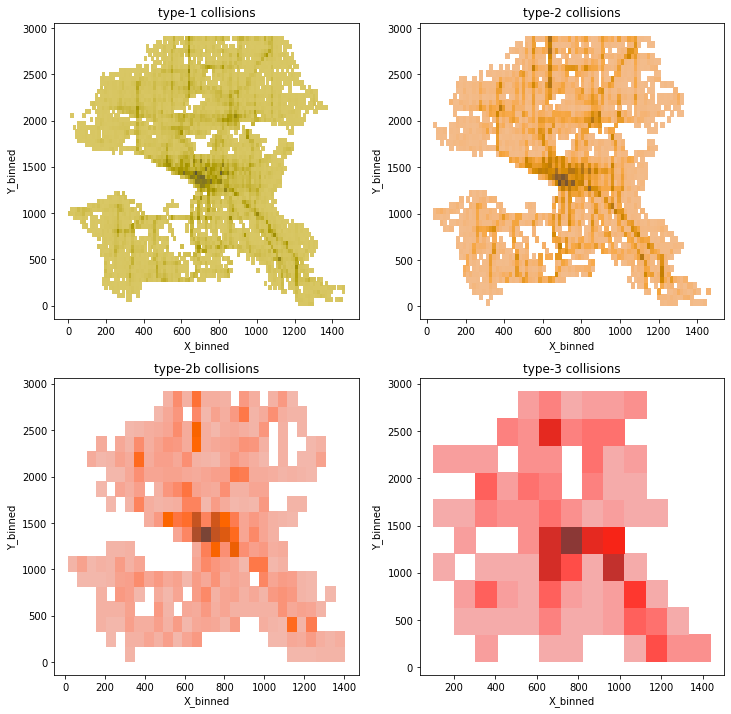

In [39]:
fig, axs = plt.subplots(2,2, figsize=(12,12))
sns.histplot(data=df_train[df_train['SEVERITYCODE']=='1'], x='X_binned', y='Y_binned', ax=axs[0,0], color=colors[0])
axs[0,0].set_title('type-1 collisions')
sns.histplot(data=df_train[df_train['SEVERITYCODE']=='2'], x='X_binned', y='Y_binned', ax=axs[0,1], color=colors[1])
axs[0,1].set_title('type-2 collisions')
sns.histplot(data=df_train[df_train['SEVERITYCODE']=='2b'], x='X_binned', y='Y_binned', ax=axs[1,0], color=colors[2])
axs[1,0].set_title('type-2b collisions')
sns.histplot(data=df_train[df_train['SEVERITYCODE']=='3'], x='X_binned', y='Y_binned', ax=axs[1,1], color=colors[3])
axs[1,1].set_title('type-3 collisions')

We can see that no matter the type of collisions, they seem to occur in the same area: in the center of the city. Lets have a better look of theese features.

In [40]:
df_train[['X_binned', 'Y_binned']].describe()

,X_binned,Y_binned
count,155378.000000,155378.000000
mean,738.282884,1516.408468
std,244.881834,684.757399
min,0.000000,0.000000
25%,591.000000,983.000000
50%,737.000000,1466.000000
75%,900.000000,2056.000000
max,1466.000000,2914.000000


We will thus replace all the NA values by the median of the `X_binned` and `Y_binned` values.

### Junction type

In [41]:
df_train['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              73502
At Intersection (intersection related)               52121
Mid-Block (but intersection related)                 18447
Driveway Junction                                     8689
At Intersection (but not related to intersection)     1718
Ramp Junction                                          136
Unknown                                                  6
Name: JUNCTIONTYPE, dtype: int64

In [42]:
missing_value_rate(df_train, 'SEVERITYCODE', 'JUNCTIONTYPE')

,Nb of missing values for JUNCTIONTYPE,Rate of missing values for JUNCTIONTYPE
SEVERITYCODE,,
1,4747,4.32%
2,322,0.69%
2b,15,0.61%
3,1,0.36%


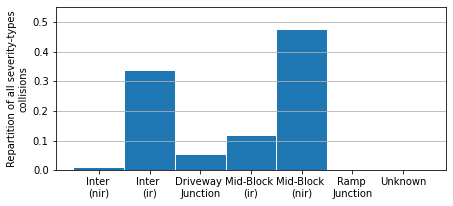

In [43]:
labels=['Inter \n(nir)',
 'Inter \n(ir)',
 'Driveway \nJunction',
 'Mid-Block \n(ir)',
 'Mid-Block \n(nir)',
 'Ramp \nJunction',
 'Unknown']

histo_presentation(
    df=df_train,
    col_histo='all_data',
    col_data='JUNCTIONTYPE',
    y_labels='Repartition of all severity-types\ncollisions',
    title='',
    with_density=True,
    y_max=0.55,
    x_labels=labels,
    ncol=1,
    with_return=False,
)

['At Intersection (but not related to intersection)',
 'At Intersection (intersection related)',
 'Driveway Junction',
 'Mid-Block (but intersection related)',
 'Mid-Block (not related to intersection)',
 'Ramp Junction',
 'Unknown']

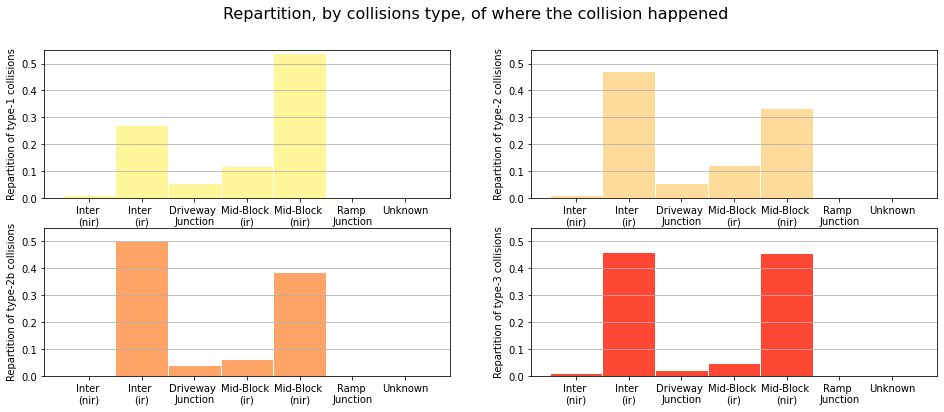

In [44]:
labels=['Inter \n(nir)',
 'Inter \n(ir)',
 'Driveway \nJunction',
 'Mid-Block \n(ir)',
 'Mid-Block \n(nir)',
 'Ramp \nJunction',
 'Unknown']

histo_presentation(
    df=df_train,
    col_histo='SEVERITYCODE',
    col_data='JUNCTIONTYPE',
    colors=colors,
    y_labels='Repartition of type-{} collisions',
    title='Repartition, by collisions type, of where the collision happened',
    with_density=True,
    y_max=0.55,
    x_labels=labels,
    wcol=8,
)

In [45]:
matrix_same_repartition(
    df_train, 
    'JUNCTIONTYPE',
)

,1,2,2b,3
1 has same rep. as,True,False,False,False
2 has same rep. as,False,True,False,False
2b has same rep. as,False,False,True,False
3 has same rep. as,False,False,False,True


We can see that there is a clear difference between where the collision happened in relation with the kind of collision. This is backed by a chi-squared test.

We can filled missing data by the most frequent feature : *Mid-Block (not intersection related)*. And it should not add much bias because the missing values are more on type-1 collisions for which it is also the most frequent feature.

Moreover we can combine *Ramp Junction* and *Driveway Junction* into a *Junction* feature.

['1', '2', '2b', '3']

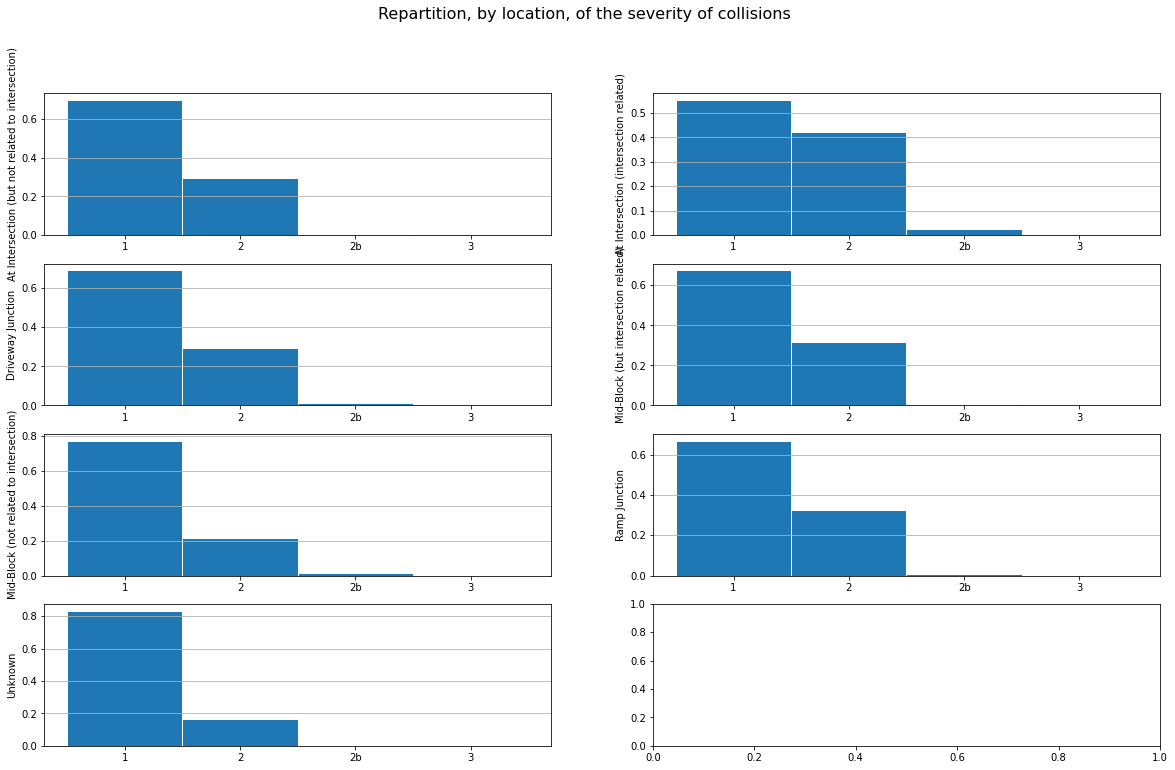

In [46]:
histo_presentation(
    df=df_train,
    col_histo='JUNCTIONTYPE',
    col_data='SEVERITYCODE',
    y_labels='{}',
    title='Repartition, by location, of the severity of collisions',
    with_density=True,
    #y_max=0.4,
    wcol=10,
)

### Looking through date and time

#### Analyzing the evolution through the years

In [47]:
df_train['YEAR']=df_train['INCDATE'].apply(lambda x: int(x.split(' ')[0].split('/')[0]))

In [48]:
df_year=pd.DataFrame()
df_year_100=pd.DataFrame()
for code in df_train['SEVERITYCODE'].unique():
    df_year['{}'.format(code)]=df_train.loc[(df_train['YEAR']!=2020) & (df_train['SEVERITYCODE']==code),'YEAR'].value_counts()
    df_year_100['{}'.format(code)]=df_year['{}'.format(code)]/df_year.loc[2004,'{}'.format(code)]*100
    
df_year.sort_index(inplace=True)
df_year_100.sort_index(inplace=True)

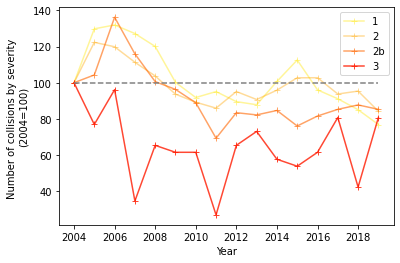

In [49]:
df_year_100[:].plot(marker='+', color=colors)
plt.plot([2004, 2019], [100, 100], color='grey', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of collisions by severity \n(2004=100)')
plt.show()

We can see that globally the number of collisions goes down from 2004 to 2019. It is the case for every kind of collisions. Nevertheless, except for the most severe collisions (`3`) - but probably due to the fact that they are quite few compared to the other sort - all the others are mostly moving in the same direction and at the same speed.
**We can thus assume that the datas we have are coherent through the period analyzed.**

#### Vizualisation by the month or the day in the week

In [50]:
df_train['MONTH']=df_train['INCDATE'].apply((lambda x: int(x.split(' ')[0].split('/')[1])))

df_train['DAYS']=df_train['INCDATE'].apply(lambda x: \
            datetime(\
                int(x.split(' ')[0].split('/')[0]), \
                int(x.split(' ')[0].split('/')[1]),\
                int(x.split(' ')[0].split('/')[2]) \
                    ).weekday() )

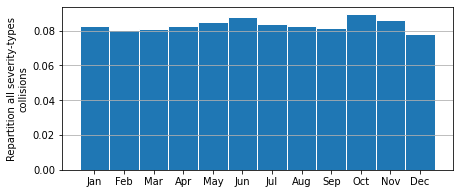

In [51]:
months=[datetime(2020,i,1).strftime('%b') for i in range(1,13)]

histo_presentation(
    df=df_train[~df_train['MONTH'].isna()],
    col_histo='all_data',
    col_data='MONTH',
    y_labels='Repartition all severity-types\ncollisions',
    x_labels=months,
    with_density=True,
    ncol=1,
    with_return=False,
    x_weights=np.array([31,28,31,30,31,30,31,31,30,31,30,31]),
)

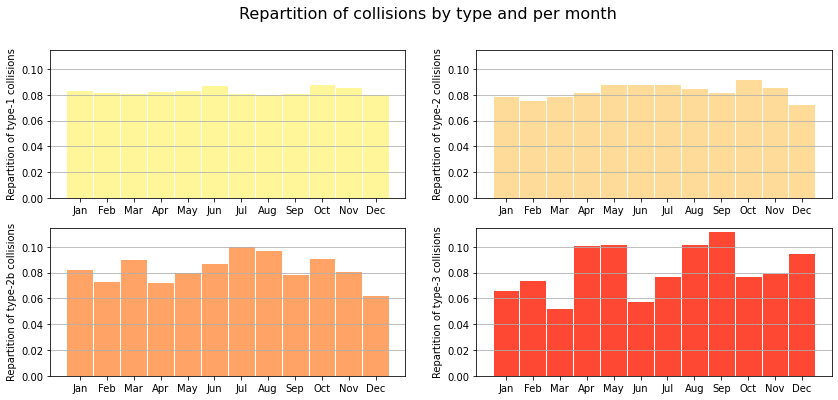

In [52]:
months=[datetime(2020,i,1).strftime('%b') for i in range(1,13)]

histo_presentation(
    df=df_train[~df_train['MONTH'].isna()],
    col_histo='SEVERITYCODE',
    col_data='MONTH',
    y_labels='Repartition of type-{} collisions',
    x_labels=months,
    colors=colors,
    with_density=True,
    y_max=0.115,
    title='Repartition of collisions by type and per month',
    with_return=False,
    x_weights=np.array([31,28,31,30,31,30,31,31,30,31,30,31]),
)

In [53]:
s0=pd.Series(data=np.array([31,28,31,30,31,30,31,31,30,31,30,31]), index=[i for i in range(1,13)])

for code in ['1', '2', '2b', '3']:
    bool=has_same_repartition(s0, df_train.loc[df_train['SEVERITYCODE']==code, 'MONTH'].value_counts())
    if not bool:
        print('The weighted repartition of type-{} collisions by month is NOT a uniform repartition'.format(code))
    else:
        print('The weighted repartition of type-{} collisions by month might be a uniform repartition'.format(code))

The weighted repartition of type-1 collisions by month is NOT a uniform repartition
The weighted repartition of type-2 collisions by month is NOT a uniform repartition
The weighted repartition of type-2b collisions by month is NOT a uniform repartition
The weighted repartition of type-3 collisions by month might be a uniform repartition


In [54]:
has_same_repartition(s0, df_train.loc[:, 'MONTH'].value_counts())

False

In [55]:
matrix_same_repartition(
    df_train, 
    'MONTH',
)

,1,2,2b,3
1 has same rep. as,True,False,False,False
2 has same rep. as,False,True,False,False
2b has same rep. as,False,False,True,False
3 has same rep. as,True,True,False,True


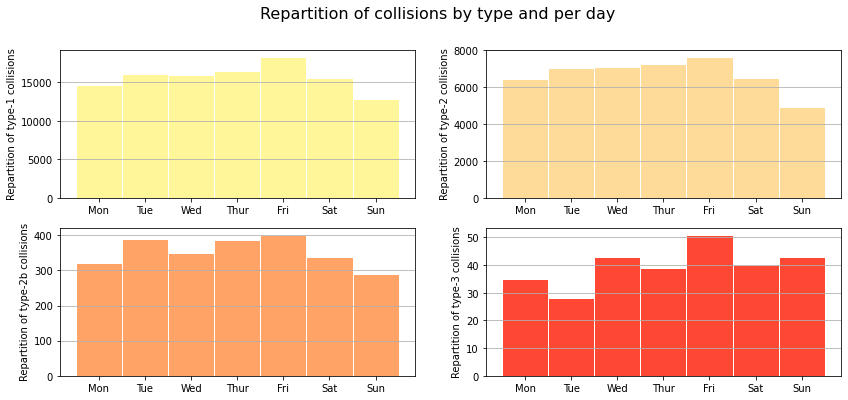

In [56]:
days=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

histo_presentation(
    df=df_train[~df_train['DAYS'].isna()],
    col_histo='SEVERITYCODE',
    col_data='DAYS',
    y_labels='Repartition of type-{} collisions',
    x_labels=days,
    colors=colors,
    with_density=False,
    title='Repartition of collisions by type and per day',
    with_return=False,
)

We can see that the month have not much effect on the number of type-1 collisions. But, the more severe the collision, the more it seems to depend on the month.
Concerning the day in the week, we can see a peak on Friday and much less collisions during the week-end; except for the type-3 collisions, which still occure more on Friday, but diminish less during the week-end, compared to the other types.

Lets assure ourselves that these findings are statistically relevant. We use a chi2-test to test the hypothesis that the different distributions are uniform or not, and if they have the same repartition.

In [57]:
matrix_same_repartition(
    df_train, 
    'DAYS',
)

,1,2,2b,3
1 has same rep. as,True,False,False,False
2 has same rep. as,False,True,False,False
2b has same rep. as,True,True,True,False
3 has same rep. as,True,True,True,True


In [58]:
M=[[is_uniform(df_train.loc[df_train['SEVERITYCODE']==code, time].value_counts()) for time in ['MONTH', 'DAYS']] for code in ['1', '2', '2b', '3']]
M=[[is_uniform(df_train.loc[:, time].value_counts()) for time in ['MONTH', 'DAYS']]]+M
df_M=pd.DataFrame(M)
df_M.rename({0:'Repartition by month', 1: 'Repartition by day'}, axis=1).rename({0:'all types', 1:'type-1', 2:'type-2', 3:'type-2b', 4:'type-3'})

,Repartition by month,Repartition by day
all types,False,False
type-1,False,False
type-2,False,False
type-2b,False,False
type-3,True,True


We can tell that the distributions are not uniform (at 95%), except for the type-3 severity (due to the low number of datas).

In [59]:
missing_value_rate(df_train, 'SEVERITYCODE', 'DAYS')

,Nb of missing values for DAYS,Rate of missing values for DAYS
SEVERITYCODE,,
1,0,0.0%
2,0,0.0%
2b,0,0.0%
3,0,0.0%


#### Vizualisation with time

In [60]:
def time(x):
    try:
        h,b=int(x.split(' ')[1].split(':')[0]) , x.split(' ')[2]
        if b=='AM' and h!=12:
            t=h
        elif b=='AM' and h==12:
            t=0
        elif b=='PM' and h!=12:
            t=h+12
        else:
            t=12
        return t
    except:
        return np.nan

In [61]:
df_train['TIME']=df_train['INCDTTM'].apply(time)

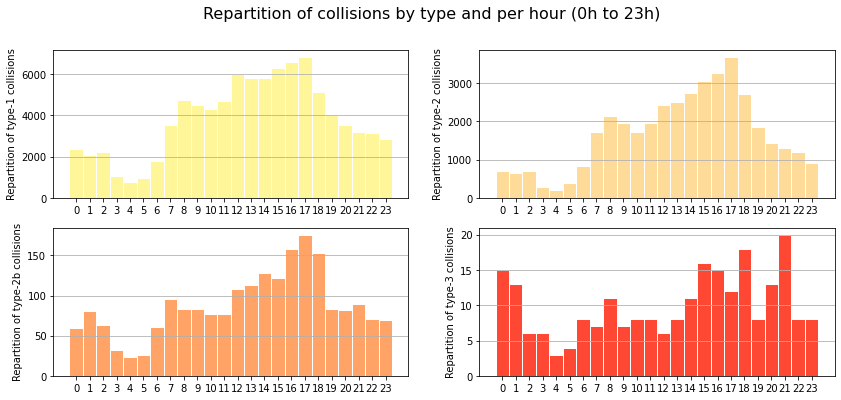

In [62]:
histo_presentation(
    df=df_train[~df_train['TIME'].isna()],
    col_histo='SEVERITYCODE',
    col_data='TIME',
    y_labels='Repartition of type-{} collisions',
    x_labels=[i for i in range(24)],
    colors=colors,
    with_density=False,
    #y_max=0.8,
    title='Repartition of collisions by type and per hour (0h to 23h)',
    with_return=False,
)

In [63]:
is_uniform(df_train.loc[(df_train['SEVERITYCODE']=='3'), 'TIME'].value_counts())

False

In [64]:
matrix_same_repartition(
    df_train, 
    'TIME',
)

,1,2,2b,3
1 has same rep. as,True,False,False,False
2 has same rep. as,False,True,False,False
2b has same rep. as,False,False,True,False
3 has same rep. as,False,False,False,True


We can see that the collisions mostly occur during the working period and especially at the end of the working day (16h-18h).

The most severe collisions slightly diverge from the other types, occuring a lot during (15h-18h) but mostly at 21h (second wave of people getting home), and during the night 0h-1h (returning from parties, maybe under influence).

We can see that the time as an impact on the collision type. As the number of missing values is quite important (~25000), we will drop all the instances with a missing values. It would mostly happen for collising which occured from 2004 to 2009.

In [65]:
df_train['TIME'].isna().to_frame().join(df_train['SEVERITYCODE']).value_counts()

TIME   SEVERITYCODE
False  1               92209
       2               40278
True   1               17779
       2                6681
False  2b               2117
True   2b                361
False  3                 239
True   3                  40
dtype: int64

In [66]:
missing_value_rate(df_train, 'SEVERITYCODE', 'TIME')

,Nb of missing values for TIME,Rate of missing values for TIME
SEVERITYCODE,,
1,17779,16.16%
2,6681,14.23%
2b,361,14.57%
3,40,14.34%


['1', '2', '2b', '3']

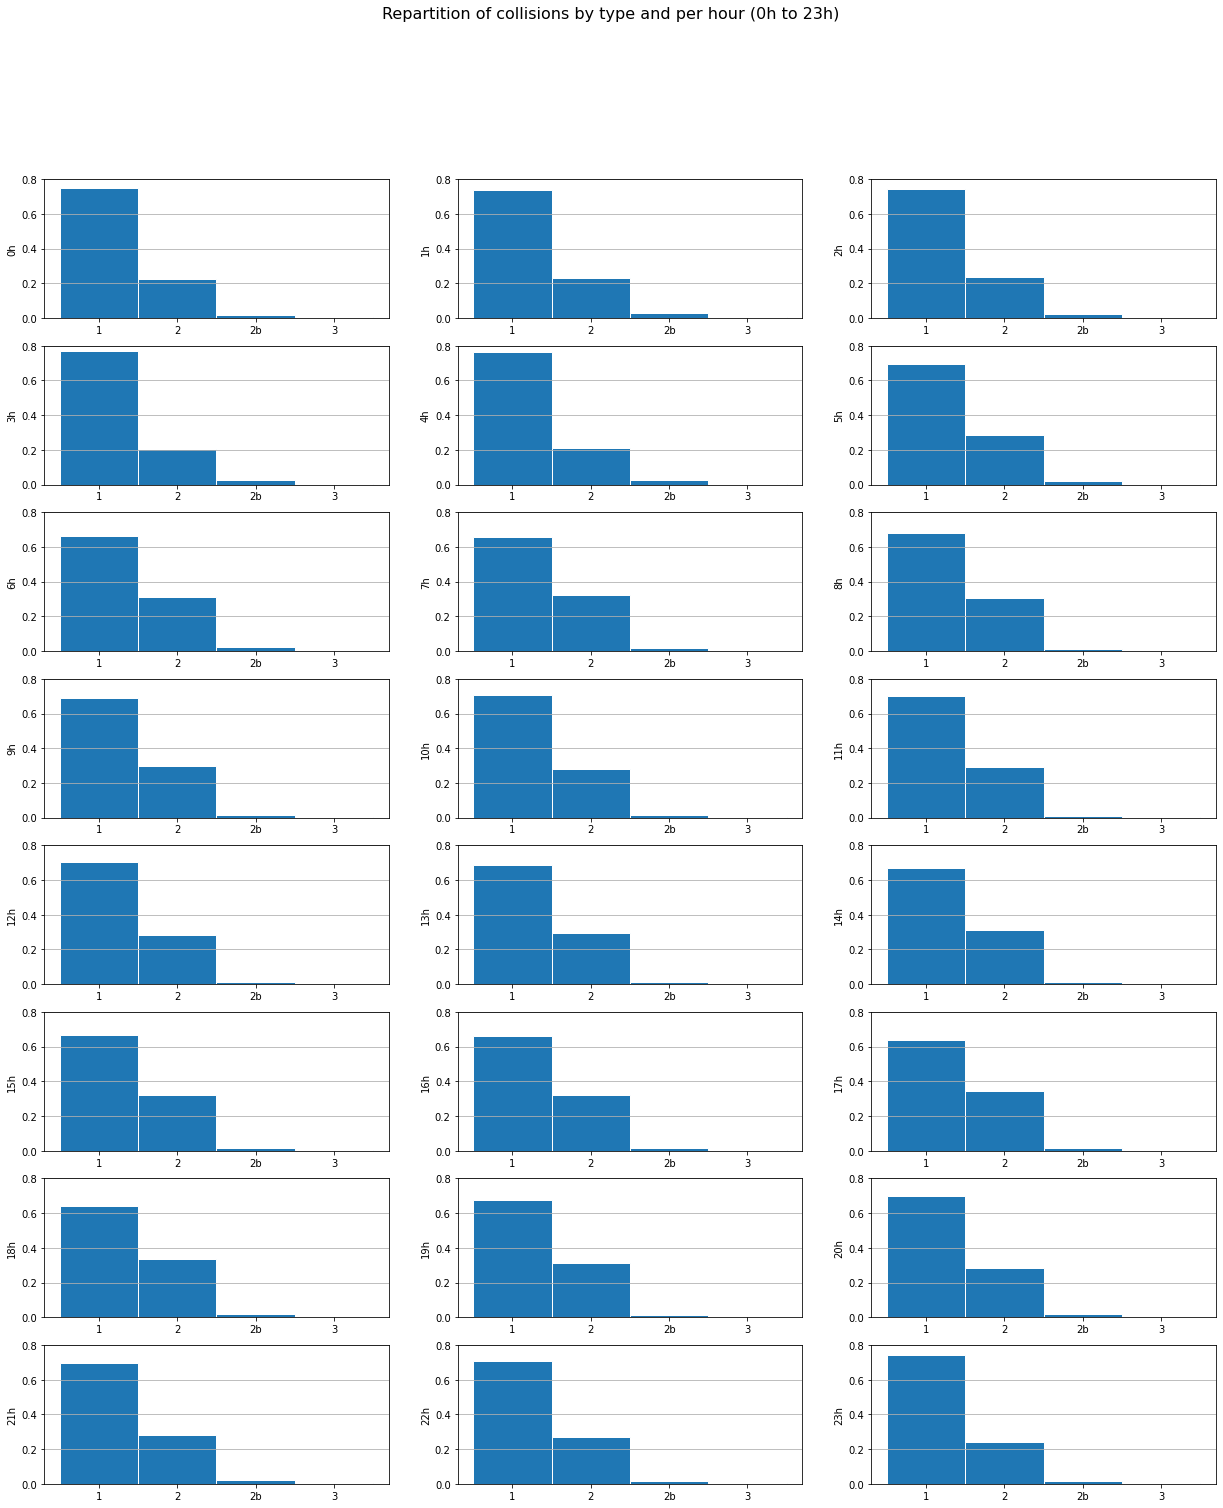

In [67]:
histo_presentation(
    df=df_train[~df_train['TIME'].isna()],
    col_histo='TIME',
    col_data='SEVERITYCODE',
    y_labels=('{}h',lambda x: int(x)),
    with_density=True,
    y_max=0.8,
    title='Repartition of collisions by type and per hour (0h to 23h)',
    ncol=3,
)

##### Missing values

In [68]:
df_train['TIME'].isna().to_frame().join(df_train['YEAR']).groupby('YEAR').mean()

,TIME
YEAR,
2004,0.305905
2005,0.295203
2006,0.304418
2007,0.302615
2008,0.299397
2009,0.289127
2010,0.011697
2011,0.055699
2012,0.062479


In [69]:
df_train.loc[(df_train['YEAR']==2020) & (df_train['TIME'].isna()), 'INCDTTM']

233        8/2/2020
298       7/25/2020
311       7/26/2020
378        2/8/2020
387       7/18/2020
            ...    
158968    7/23/2020
159038    2/17/2020
159269    8/17/2020
159446    3/22/2020
159545     8/6/2020
Name: INCDTTM, Length: 778, dtype: object

### Kind of collisions

#### Looking for the number of people involved

In [70]:
df_train[['PERSONCOUNT']].value_counts()

PERSONCOUNT
2              93606
3              29222
4              12010
1              10937
5               5411
0               4435
6               2203
7                948
8                433
9                186
10               105
11                51
12                24
14                20
13                18
17                 9
15                 8
16                 8
44                 6
25                 6
19                 6
20                 4
26                 4
18                 3
22                 3
34                 3
32                 3
47                 3
27                 3
28                 3
29                 3
37                 2
36                 2
21                 2
24                 2
23                 2
31                 1
81                 1
35                 1
30                 1
39                 1
41                 1
43                 1
48                 1
53                 1
93                 1
dtype: int64

In [71]:
missing_value_rate(df_train, 'SEVERITYCODE', 'PERSONCOUNT')

,Nb of missing values for PERSONCOUNT,Rate of missing values for PERSONCOUNT
SEVERITYCODE,,
1,0,0.0%
2,0,0.0%
2b,0,0.0%
3,0,0.0%


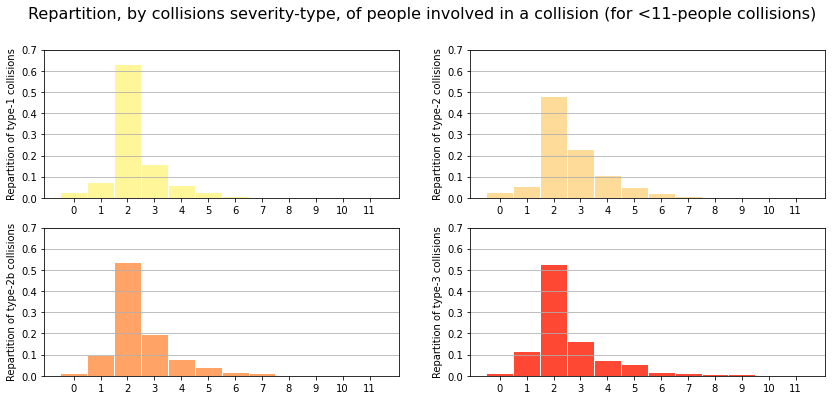

In [72]:
histo_presentation(
    df=df_train[df_train['PERSONCOUNT']<=11],
    col_histo='SEVERITYCODE',
    col_data='PERSONCOUNT',
    colors=colors,
    y_labels='Repartition of type-{} collisions',
    title='Repartition, by collisions severity-type, of people involved in a collision (for <11-people collisions)',
    with_density=True,
    y_max=0.7,
    with_return=False,
)

In [73]:
matrix_same_repartition(
    df_train, 
    'PERSONCOUNT',
)

,1,2,2b,3
1 has same rep. as,True,False,False,False
2 has same rep. as,False,True,False,False
2b has same rep. as,False,False,True,False
3 has same rep. as,False,False,False,True


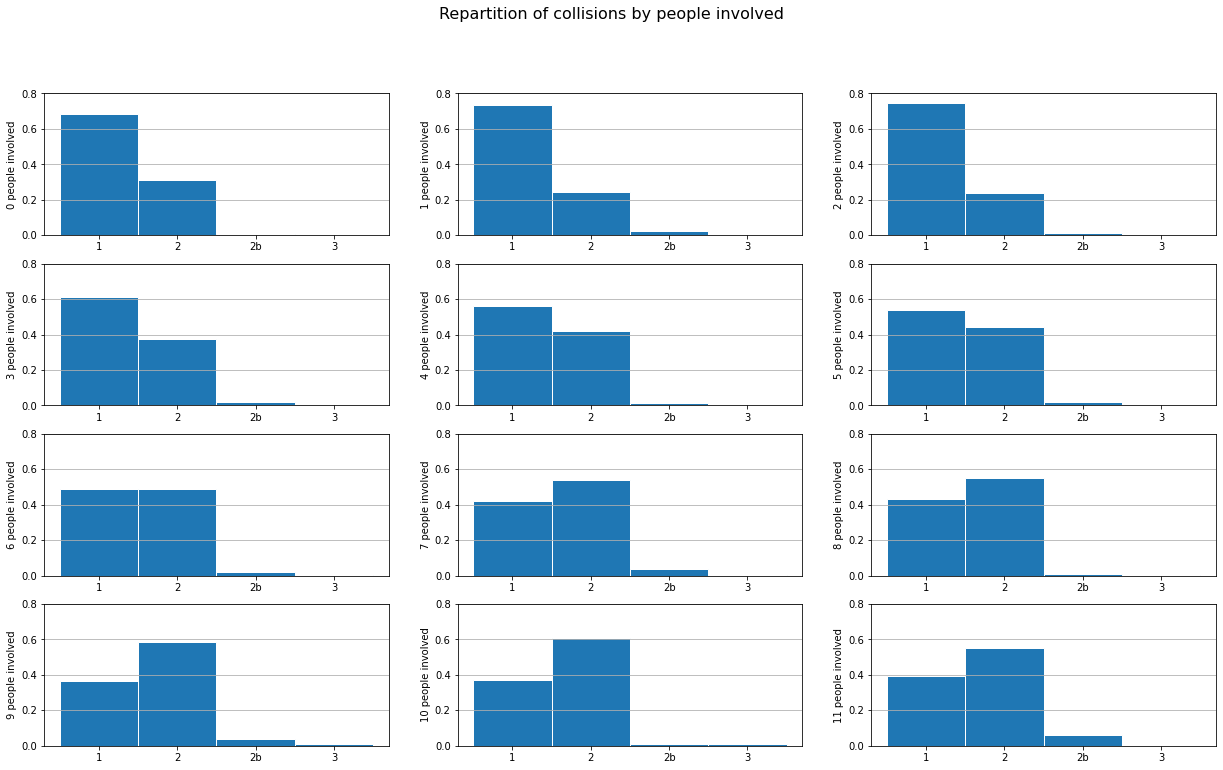

In [74]:
histo_presentation(
    df=df_train[df_train['PERSONCOUNT']<=11], 
    col_histo='PERSONCOUNT', 
    col_data='SEVERITYCODE', 
    y_labels='{} people involved', 
    title='Repartition of collisions by people involved', 
    with_density=True,
    y_max=0.8,
    ncol=3,
    #wcol=6,
    with_return=False,
) 

#### Looking for missing values for pedestrians, cyclists and vehicles

In [75]:
df_train.loc[~((df_train['PEDCOUNT']==0) & (df_train['PEDCYLCOUNT']==0) & (df_train['VEHCOUNT']==0)), 'no_kd_coll']=0

In [76]:
missing_value_rate(df_train, 'SEVERITYCODE', 'no_kd_coll')

,Nb of missing values for no_kd_coll,Rate of missing values for no_kd_coll
SEVERITYCODE,,
1,3062,2.78%
2,800,1.7%
2b,43,1.74%
3,9,3.23%


#### Looking for pedestrians

[0, 1, 2, 3, 4, 5, 6]

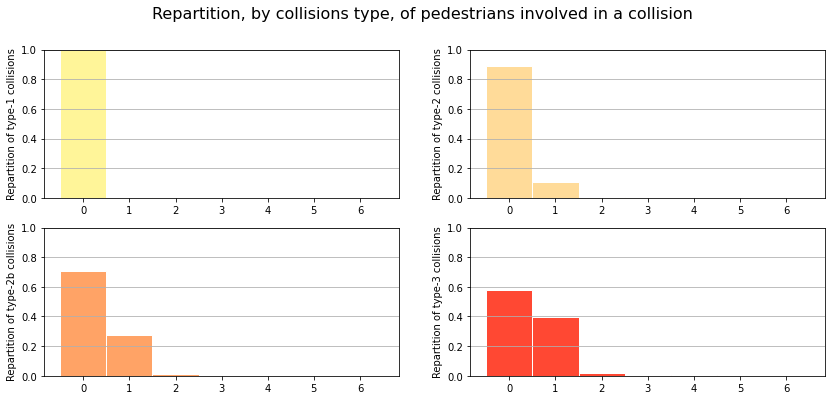

In [77]:
histo_presentation(
    df=df_train,
    col_histo='SEVERITYCODE',
    col_data='PEDCOUNT',
    colors=colors,
    y_labels='Repartition of type-{} collisions',
    title='Repartition, by collisions type, of pedestrians involved in a collision',
    with_density=True,
    y_max=1,
)

In [78]:
matrix_same_repartition(
    df_train, 
    'PEDCOUNT',
)

,1,2,2b,3
1 has same rep. as,True,False,False,False
2 has same rep. as,False,True,False,False
2b has same rep. as,False,False,True,False
3 has same rep. as,False,False,False,True


['1', '2', '2b', '3']

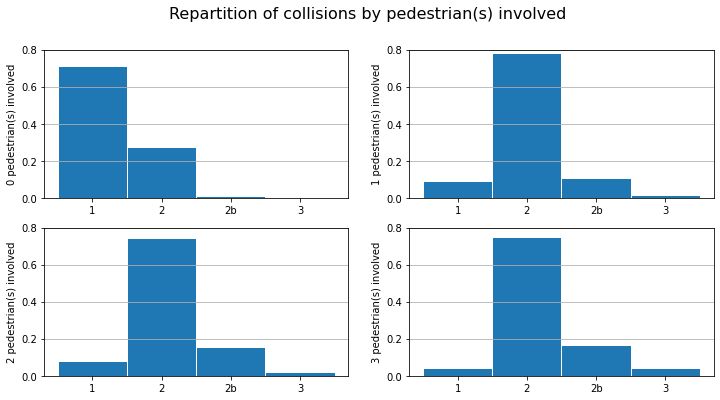

In [79]:
histo_presentation(
    df=df_train[df_train['PEDCOUNT']<=3], 
    col_histo='PEDCOUNT', 
    col_data='SEVERITYCODE', 
    y_labels='{} pedestrian(s) involved', 
    title='Repartition of collisions by pedestrian(s) involved', 
    with_density=True,
    y_max=0.8,
    ncol=2,
    wcol=6,
) 

#### Looking for cyclists

[0, 1, 2]

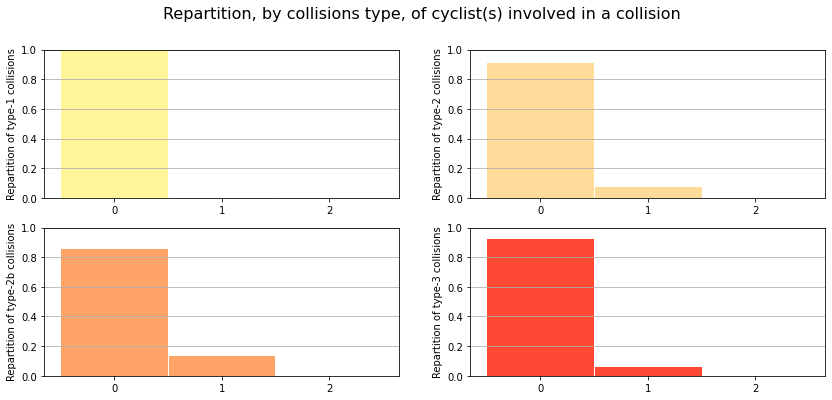

In [80]:
histo_presentation(
    df=df_train,
    col_histo='SEVERITYCODE',
    col_data='PEDCYLCOUNT',
    colors=colors,
    y_labels='Repartition of type-{} collisions',
    title='Repartition, by collisions type, of cyclist(s) involved in a collision',
    with_density=True,
    y_max=1,
)

In [81]:
matrix_same_repartition(
    df_train, 
    'PEDCYLCOUNT',
)

,1,2,2b,3
1 has same rep. as,True,False,False,False
2 has same rep. as,False,True,False,False
2b has same rep. as,False,False,True,False
3 has same rep. as,False,True,False,True


['1', '2', '2b', '3']

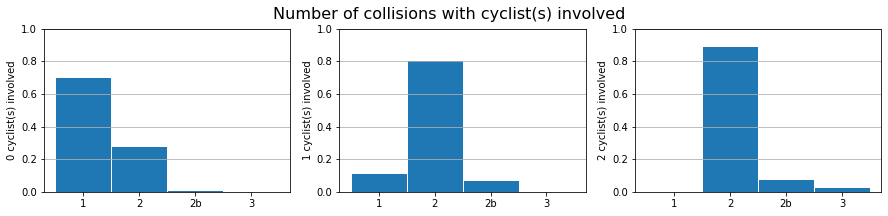

In [82]:
histo_presentation(
    df=df_train, 
    col_histo='PEDCYLCOUNT', 
    col_data='SEVERITYCODE', 
    y_labels='{} cyclist(s) involved', 
    title='Number of collisions with cyclist(s) involved', 
    with_density=True,
    y_max=1,
    ncol=3,
    wcol=5,
) 

#### Looking for vehicles

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

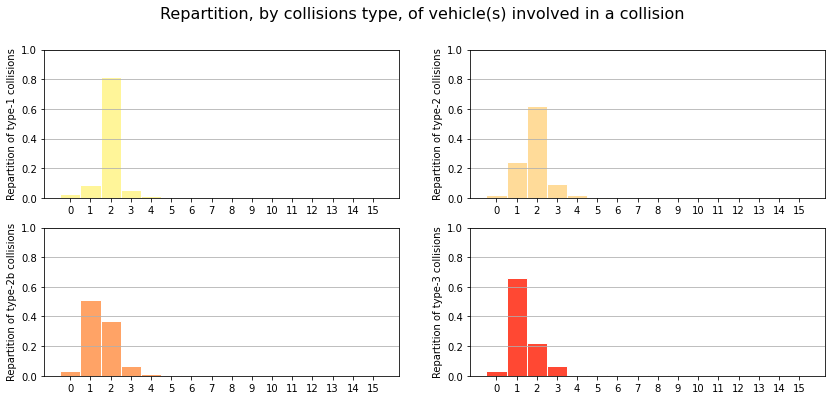

In [83]:
histo_presentation(
    df=df_train,
    col_histo='SEVERITYCODE',
    col_data='VEHCOUNT',
    colors=colors,
    y_labels='Repartition of type-{} collisions',
    title='Repartition, by collisions type, of vehicle(s) involved in a collision',
    with_density=True,
    y_max=1,
)

In [84]:
matrix_same_repartition(
    df_train, 
    'VEHCOUNT',
)

,1,2,2b,3
1 has same rep. as,True,False,False,False
2 has same rep. as,False,True,False,False
2b has same rep. as,False,False,True,False
3 has same rep. as,False,False,False,True


['1', '2', '2b', '3']

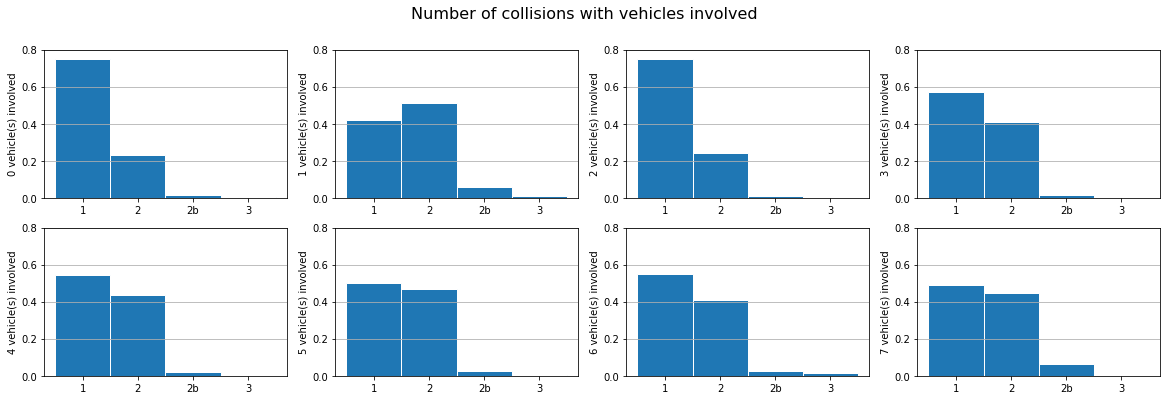

In [85]:
histo_presentation(
    df=df_train[df_train['VEHCOUNT']<=7], 
    col_histo='VEHCOUNT', 
    col_data='SEVERITYCODE', 
    y_labels='{} vehicle(s) involved', 
    title='Number of collisions with vehicles involved', 
    with_density=True,
    y_max=0.8,
    ncol=4,
    wcol=5,
) 

#### Conclusion on pedestrians, cyclists and vehicles

In [86]:
df_train.loc[df_train['VEHCOUNT']==6, ['PEDCYLCOUNT', 'PEDCOUNT', 'SEVERITYCODE', 'STATUS']].rename(columns={'STATUS':'Number'}).groupby(['SEVERITYCODE', 'PEDCOUNT','PEDCYLCOUNT']).count()

Number
SEVERITYCODE PEDCOUNT PEDCYLCOUNT        
1            0        0                66
2            0        0                48
             1        0                 1
2b           0        0                 3
3            0        0                 1
                      1                 1

We will thus create 4 classes for `VEHCOUNT` : 
 + zero vehicule involved (meaning the collision comes from cyclists and pedestrians),
 + one vehicule involved (higher risks of severe injury, because the collision happenned mostly with a cyclist or pedestrian),
 + two vehicules involved (less risks of severe injury, because mostly not include cyclist or pedestrian),
 + more than two vehicules involved (higher risk of severe injury, because the collision might thus be more violent, even if they do not include cyclists or pedestrians).

---

We will create 2 classes for `PEDCOUNT`:
 + 0, when no pedestrian is involved,
 + 1, when 1 or more than 1 pedestrian is involved.
 
---

We will create 2 classes for `PEDCYLCOUNT`:
 + 0, when no pedestrian is involved,
 + 1, when 1 or more than 1 pedestrian is involved.
 

In [87]:
df_train['PEDCOUNT'].value_counts()

0    153220
1      6233
2       219
3        24
4         5
5         2
6         1
Name: PEDCOUNT, dtype: int64

In [88]:
df_train['PEDCYLCOUNT'].value_counts()

0    154913
1      4754
2        37
Name: PEDCYLCOUNT, dtype: int64

In [89]:
df_train['VEHCOUNT'].value_counts()

2     119968
1      22302
3      10696
0       4097
4       2011
5        431
6        120
7         47
8         15
9          7
11         5
15         1
14         1
13         1
12         1
10         1
Name: VEHCOUNT, dtype: int64

And for the missing values we will replace them by 0, 0, 2 (resp.) for `PEDCOUNT`, `PEDCYLCOUNT`, `VEHCOUNT` (resp.) as they are the most commune values.

#### Looking for collision type

In [90]:
df_train['COLLISIONTYPE'].value_counts()

Parked Car    38651
Angles        28372
Rear Ended    27780
Other         19522
Sideswipe     15149
Left Turn     11265
Pedestrian     6155
Cycles         4734
Right Turn     2410
Head On        1736
Name: COLLISIONTYPE, dtype: int64

In [91]:
missing_value_rate(df_train, 'SEVERITYCODE', 'COLLISIONTYPE')

,Nb of missing values for COLLISIONTYPE,Rate of missing values for COLLISIONTYPE
SEVERITYCODE,,
1,3067,2.79%
2,811,1.73%
2b,43,1.74%
3,9,3.23%


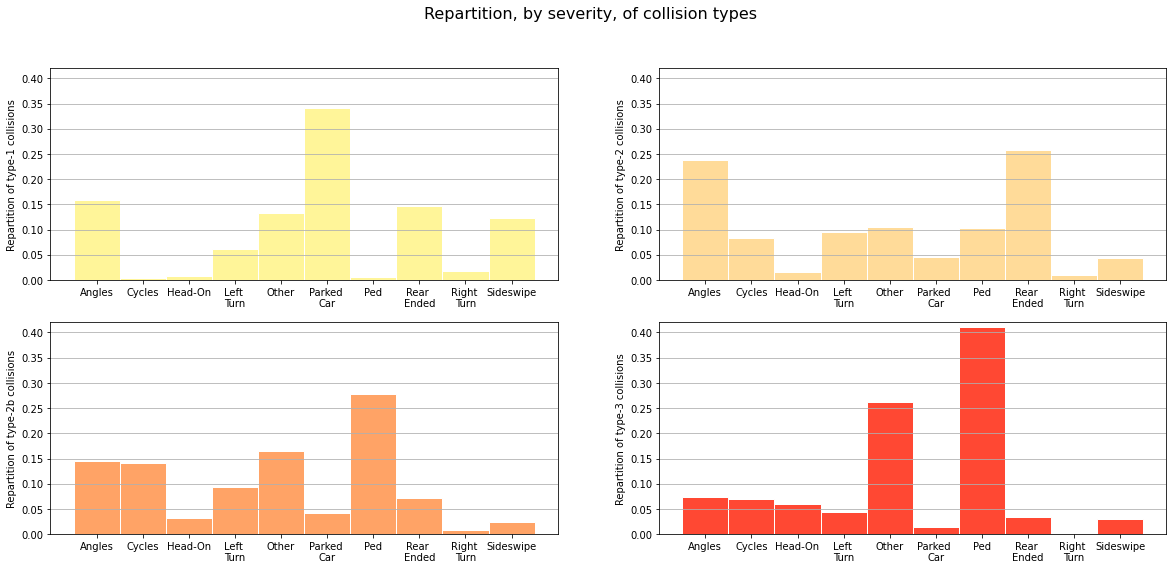

In [92]:
x_labels=['Angles',
 'Cycles',
 'Head-On',
 'Left \nTurn',
 'Other',
 'Parked \nCar',
 'Ped',
 'Rear \nEnded',
 'Right \nTurn',
 'Sideswipe']

histo_presentation(
    df=df_train,
    col_histo='SEVERITYCODE',
    col_data='COLLISIONTYPE',
    colors=colors,
    y_labels='Repartition of type-{} collisions',
    x_labels=x_labels,
    title='Repartition, by severity, of collision types',
    with_density=True,
    y_max=0.42,
    ncol=2,
    wcol=10,
    wrow=3*10/7,
    with_return=False,
)

In [93]:
matrix_same_repartition(
    df_train, 
    'COLLISIONTYPE',
)

,1,2,2b,3
1 has same rep. as,True,False,False,False
2 has same rep. as,False,True,False,False
2b has same rep. as,False,False,True,False
3 has same rep. as,False,False,False,True


['1', '2', '2b', '3']

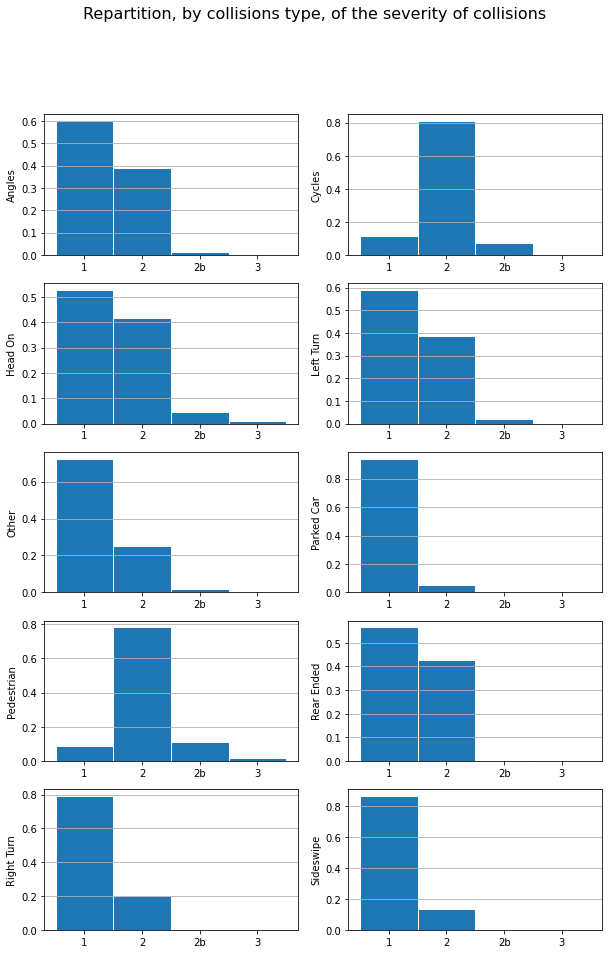

In [94]:
histo_presentation(
    df=df_train,
    col_histo='COLLISIONTYPE',
    col_data='SEVERITYCODE',
    y_labels='{}',
    title='Repartition, by collisions type, of the severity of collisions',
    with_density=True,
    #y_max=0.4,
    ncol=2,
    wcol=5,
)

### Looking for Hit a parked car

In [95]:
df_train['HITPARKEDCAR'].value_counts()

N    153687
Y      6017
Name: HITPARKEDCAR, dtype: int64

In [96]:
df_train['HITPARKEDCAR'].replace({'Y':1, 'N':0}, inplace=True)

In [97]:
df_train[['HITPARKEDCAR', 'SEVERITYCODE']].groupby('SEVERITYCODE').mean()

,HITPARKEDCAR
SEVERITYCODE,
1,0.051042
2,0.008263
2b,0.006053
3,0.000000


The more the collision involve a car parked, the less severe it is.

### Looking for the weather, road  and light conditions

#### Weather conditions

In [98]:
df_train['WEATHER'].value_counts()

Clear                       91329
Raining                     27301
Overcast                    22822
Unknown                     12125
Snowing                       728
Other                         679
Fog/Smog/Smoke                462
Sleet/Hail/Freezing Rain       98
Blowing Sand/Dirt              43
Severe Crosswind               22
Partly Cloudy                   7
Name: WEATHER, dtype: int64

The number of values for the categories different from Clear, Raining and Overcast are very small, and thus might not be statistically significant. So we will divide the feature between : good visibility (*Clear, Overcast, Severe Crosswind, Partly Cloudy*) and bad visibility (*Raining, Snowing, Fog, Sleet, Blowing Sand*).

['1', '2', '2b', '3']

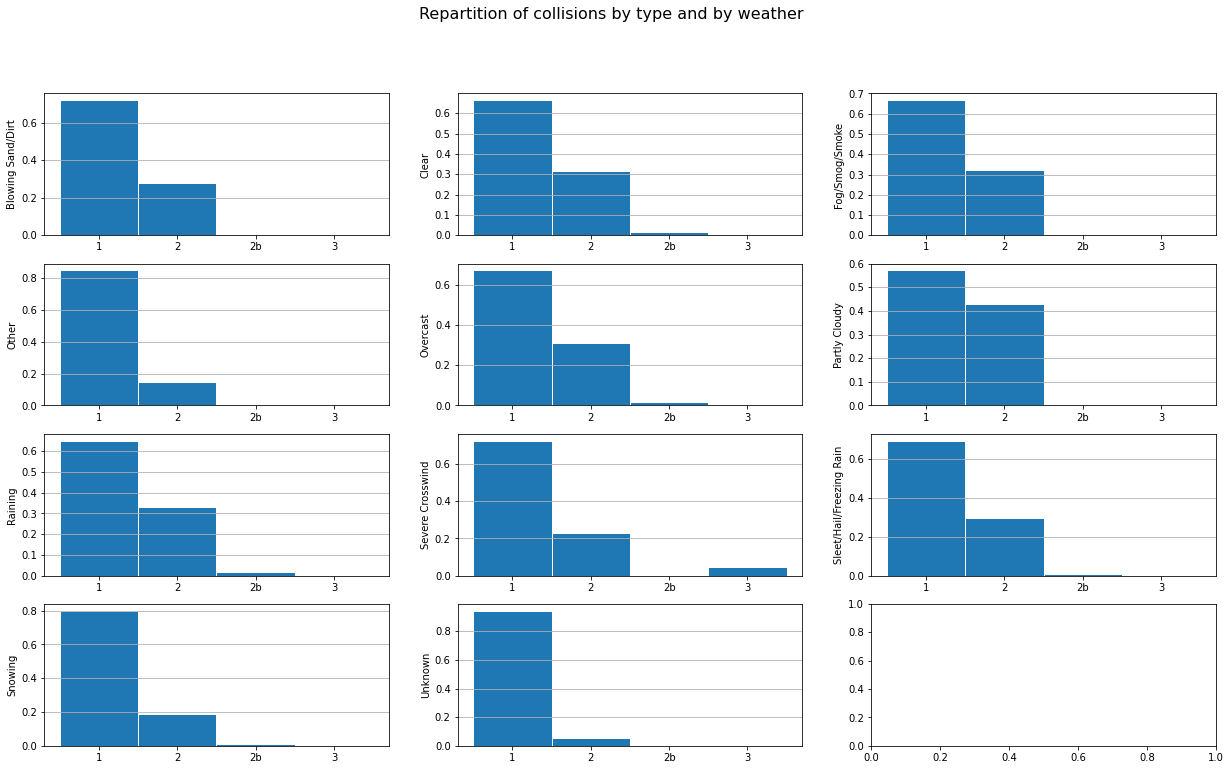

In [99]:
histo_presentation(
    df=df_train[~df_train['WEATHER'].isna()],
    col_histo='WEATHER',
    col_data='SEVERITYCODE',
    y_labels='{}',
    with_density=True,
    #y_max=0.8,
    title='Repartition of collisions by type and by weather',
    ncol=3,
)

In [100]:
replacements={'Unknown': np.nan, 'Other': np.nan, \
              'Clear': 1, 'Overcast': 1, 'Severe Crosswind': 1, 'Partly Cloudy': 1, \
              'Raining': 0, 'Snowing': 0, 'Fog/Smog/Smoke': 0, 'Sleet/Hail/Freezing Rain': 0, 'Blowing Sand/Dirt': 0
             }

df_train['GOOD_WEATHER']=df_train['WEATHER'].replace(replacements)

In [101]:
missing_value_rate(df_train, 'SEVERITYCODE', 'GOOD_WEATHER')

,Nb of missing values for GOOD_WEATHER,Rate of missing values for GOOD_WEATHER
SEVERITYCODE,,
1,15191,13.81%
2,1608,3.42%
2b,82,3.31%
3,11,3.94%


In [102]:
df_train['GOOD_WEATHER'].mean()

0.7995126459961348

In [103]:
df_train[['SEVERITYCODE', 'GOOD_WEATHER']].groupby('SEVERITYCODE').mean().apply(lambda x: '{}%'.format(round(x[0]*100,2)), axis=1).to_frame().rename(columns={0:'Collisions rate with good weather'})

,Collisions rate with good weather
SEVERITYCODE,
1,80.19%
2,79.31%
2b,82.1%
3,83.96%


#### Road conditions

In [104]:
df_train['ROADCOND'].value_counts()

Dry               102400
Wet                39039
Unknown            12142
Ice                  994
Snow/Slush           808
Standing Water        99
Other                 99
Sand/Mud/Dirt         64
Oil                   48
Name: ROADCOND, dtype: int64

The number of values for the categories different from Dry and Wet are very small, and thus might not be statistically significant. So we will divide the feature between : good condition (*Dry*) and bad condition (*Wet, Ice, Snow/Slush, Standing Water, Sand/Mud/Dirt, Oil*).

In [105]:
replacements={'Unknown': np.nan, 'Other': np.nan, \
              'Dry': 1, \
              'Wet': 0, 'Ice': 0, 'Snow/Slush': 0, 'Standing Water': 0, 'Sand/Mud/Dirt': 0, 'Oil':0,
             }

df_train['GOOD_ROAD']=df_train['ROADCOND'].replace(replacements)

In [106]:
missing_value_rate(df_train, 'SEVERITYCODE', 'GOOD_ROAD')

,Nb of missing values for GOOD_ROAD,Rate of missing values for GOOD_ROAD
SEVERITYCODE,,
1,14709,13.37%
2,1464,3.12%
2b,69,2.78%
3,10,3.58%


In [107]:
df_train[['SEVERITYCODE', 'GOOD_ROAD']].groupby('SEVERITYCODE').mean().apply(lambda x: '{}%'.format(round(x[0]*100,2)), axis=1).to_frame().rename(columns={0:'Collisions rate with good road condition'})

,Collisions rate with good road condition
SEVERITYCODE,
1,71.46%
2,71.02%
2b,74.35%
3,79.18%


#### Light conditions

In [108]:
df_train['LIGHTCOND'].value_counts()

Daylight                    95359
Dark - Street Lights On     39924
Unknown                     10861
Dusk                         4841
Dawn                         2095
Dark - No Street Lights      1271
Dark - Street Lights Off     1000
Other                         196
Dark - Unknown Lighting        18
Name: LIGHTCOND, dtype: int64

The number of values in each categories seems to be enough to give statistically significant results. Nevertheless, some of them (*Dusk*/*Dawn*, *Dark - No Street Lights*/*Dark - Street Lights Off*) are quite the same. We can thus aggregate them. Plus, we will put the *Dark - Unknown Lighting* in the *Dark - Street Lights On* categorie as it is the most frequent for dark light conditions.

In [109]:
replacements={'Unknown': np.nan, 'Other': np.nan, \
              'Dusk': 'Dusk/Dawn', 'Dawn': 'Dusk/Dawn', \
              'Dark - No Street Lights': 'Dark - No Lights', 'Dark - Street Lights Off': 'Dark - No Lights', \
              'Dark - Street Lights On': 'Dark - With Lights', 'Dark - Unknown Lighting': 'Dark - With Lights',
             }

df_train['LIGHT_CONDITION']=df_train['LIGHTCOND'].replace(replacements)

In [110]:
missing_value_rate(df_train, 'SEVERITYCODE', 'LIGHT_CONDITION')

,Nb of missing values for LIGHT_CONDITION,Rate of missing values for LIGHT_CONDITION
SEVERITYCODE,,
1,13728,12.48%
2,1388,2.96%
2b,70,2.82%
3,10,3.58%


['Dark - No Lights', 'Dark - With Lights', 'Daylight', 'Dusk/Dawn']

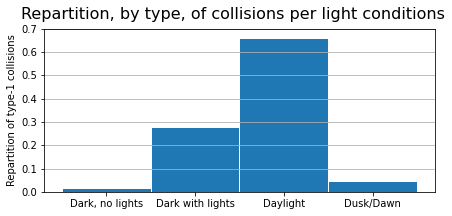

In [111]:
histo_presentation(
    df=df_train,
    col_histo='all_data',
    col_data='LIGHT_CONDITION',
    y_labels='Repartition of type-{} collisions',
    with_density=True,
    y_max=0.7,
    x_labels=['Dark, no lights', 'Dark with lights',  'Daylight', 'Dusk/Dawn'],
    title='Repartition, by type, of collisions per light conditions',
    ncol=1,
)

['Dark - No Lights', 'Dark - With Lights', 'Daylight', 'Dusk/Dawn']

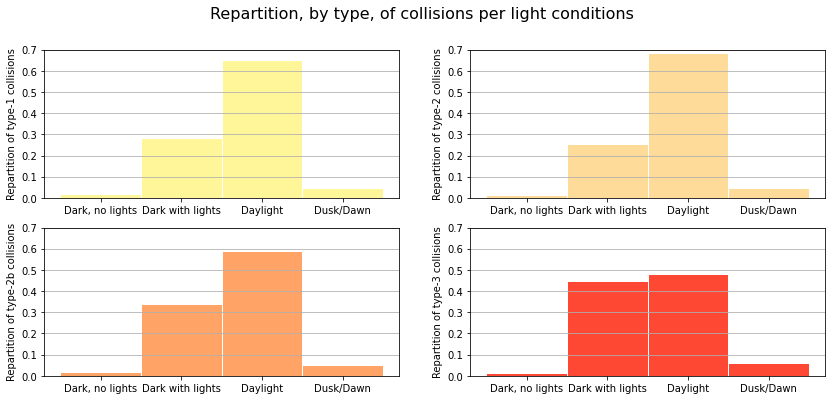

In [112]:
histo_presentation(
    df=df_train,
    col_histo='SEVERITYCODE',
    col_data='LIGHT_CONDITION',
    colors=colors,
    y_labels='Repartition of type-{} collisions',
    with_density=True,
    y_max=0.7,
    x_labels=['Dark, no lights', 'Dark with lights',  'Daylight', 'Dusk/Dawn'],
    title='Repartition, by type, of collisions per light conditions'
)

In [113]:
matrix_same_repartition(
    df_train, 
    'LIGHT_CONDITION',
)

,1,2,2b,3
1 has same rep. as,True,False,False,False
2 has same rep. as,False,True,False,False
2b has same rep. as,False,False,True,False
3 has same rep. as,False,False,False,True


['1', '2', '2b', '3']

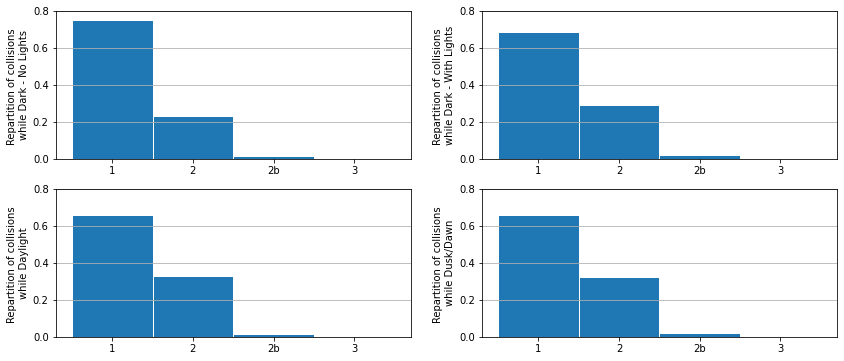

In [114]:
histo_presentation(
    df=df_train,
    col_histo='LIGHT_CONDITION',
    col_data='SEVERITYCODE',
    y_labels='Repartition of collisions \nwhile {}',
    with_density=True,
    y_max=0.8,
)

In [115]:
df_train['LIGHT_CONDITION'].isna().value_counts()

False    144508
True      15196
Name: LIGHT_CONDITION, dtype: int64

### Under Influence

In [116]:
df_train['UNDERINFL'].value_counts()

N    82745
0    65348
Y     4309
1     3388
Name: UNDERINFL, dtype: int64

We thus have to replace N,Y values by 0,1 respectively. And we can see that the most represented feature is 0 (not under influence).

In [117]:
df_train['UNDERINFL'].replace({'N':0, '0':0, 'Y':1, '1':1}, inplace=True)

In [118]:
df_train['UNDERINFL'].value_counts()

0.0    148093
1.0      7697
Name: UNDERINFL, dtype: int64

In [119]:
df_train[['SEVERITYCODE', 'UNDERINFL']].groupby('SEVERITYCODE').mean().apply(lambda x: '{}%'.format(round(x[0]*100,1)), axis=1).to_frame().rename(columns={0:'Collisions rate under influence'})

,Collisions rate under influence
SEVERITYCODE,
1,4.2%
2,6.1%
2b,13.6%
3,28.9%


In [120]:
missing_value_rate(df_train, 'SEVERITYCODE', 'UNDERINFL')

,Nb of missing values for UNDERINFL,Rate of missing values for UNDERINFL
SEVERITYCODE,,
1,3062,2.78%
2,800,1.7%
2b,43,1.74%
3,9,3.23%


The number of missing values is not that important: it can be filled by the most represented feature (0). Moreover, the repartition by collision severity is relatively the same, thus it should not bring to much bias.

## Data processing

+ Modification of the labels in `UNDERINFL`, `JUNCTIONTYPE` and `HITPARKEDCAR`

+ Binnification of continuous features ((`X`, `Y`))

+ Creating new features for weather, road and light conditions, months, days

+ Dealing with `NA` values: dropping all the `TIME` missing values, remplacing them with the most frequent value (`UNDERINFL`: 0, (`X`, `Y`): isobarycenter of the value (1.271198e+06, 229574.974116), (`GOOD_WEATHER`, `GOOD_ROAD`, `LIGHT_CONDITION`): (1,1,Daylight), `JUNCTIONTYPE`: Mid-Block (not intersection related), `COLLISIONTYPE`: Parked Car)

+ Creation of dummie variables for : `LIGHT_CONDITION`, `VEHCOUNT`, `JUNCTIONTYPE`, `COLLISIONTYPE`

+ Finally, creation of a features selector, scaler and 3-classes transformer
   

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [122]:
# modification of labels

class LabelModifier(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        
        # UNDERINFL label
        df2['UNDERINFL'].replace({'N':0, '0':0, 'Y':1, '1':1}, inplace=True)
        
        # JUNCTIONTYPE
        df2['JUNCTIONTYPE'].replace({'Driveway Junction': 'Junction', 'Ramp Junction': 'Junction'})
        
        # HITPARKEDCAR
        df2['HITPARKEDCAR'].replace({'N':0, 'Y':1}, inplace=True)
        

        return df2
    

# binnification of features

class Binnificater(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        
        # X,Y features
        nbbinsX=round(((df2['X'].max() - df2['X'].min())/30)) # /30 for 10m
        nbbinsY=round(((df2['Y'].max() - df2['Y'].min())/30))

        binsX=np.linspace(df2['X'].min(), df2['X'].max(), nbbinsX)
        binsY=np.linspace(df2['Y'].min(), df2['Y'].max(), nbbinsY)
        
        df2['X_binned']=pd.cut(df2['X'], binsX, labels=False, include_lowest=True)
        df2['Y_binned']=pd.cut(df2['Y'], binsY, labels=False, include_lowest=True)
        
        
        return df2

    
# adding features

class FeatureAdder(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        
        # WEATHER feature
        replacements={'Unknown': np.nan, 'Other': np.nan, \
              'Clear': 1, 'Overcast': 1, 'Severe Crosswind': 1, 'Partly Cloudy': 1, \
              'Raining': 0, 'Snowing': 0, 'Fog/Smog/Smoke': 0, 'Sleet/Hail/Freezing Rain': 0, 'Blowing Sand/Dirt': 0, 'Blowing Snow':0,
             }
        df2['GOOD_WEATHER']=df2['WEATHER'].replace(replacements)
        
        # ROAD feature
        replacements={'Unknown': np.nan, 'Other': np.nan, \
              'Dry': 1, \
              'Wet': 0, 'Ice': 0, 'Snow/Slush': 0, 'Standing Water': 0, 'Sand/Mud/Dirt': 0, 'Oil':0,
             }
        df2['GOOD_ROAD']=df2['ROADCOND'].replace(replacements)
        
        # LIGHT feature
        replacements={'Unknown': np.nan, 'Other': np.nan, \
              'Dusk': 'Dusk/Dawn', 'Dawn': 'Dusk/Dawn', \
              'Dark - No Street Lights': 'Dark - No Lights', 'Dark - Street Lights Off': 'Dark - No Lights', \
              'Dark - Street Lights On': 'Dark - With Lights', 'Dark - Unknown Lighting': 'Dark - With Lights',
             }
        df2['LIGHT_CONDITION']=df2['LIGHTCOND'].replace(replacements)
        
        # WITH_PED feature
        df2['WITH_PED']=df2['PEDCOUNT'].replace(to_replace=[i for i in range(1,10)], value=[1 for i in range(1,10)])
        
        # WITH_CYCL feature
        df2['WITH_CYCL']=df2['PEDCYLCOUNT'].replace(to_replace=[i for i in range(1,10)], value=[1 for i in range(1,10)])
        
        # WITH_VEH feature
        df2['WITH_VEH']=df2['VEHCOUNT'].replace(to_replace=[i for i in range(3,20)], value=[3 for i in range(3,20)])
        
        # MONTH and DAY
        df2['MONTH']=df2['INCDATE'].apply((lambda x: int(x.split(' ')[0].split('/')[1])))
        df2['DAY']=df2['INCDATE'].apply(lambda x: \
            datetime(\
                int(x.split(' ')[0].split('/')[0]), \
                int(x.split(' ')[0].split('/')[1]),\
                int(x.split(' ')[0].split('/')[2]) \
                    ).weekday() )
        
        
        return df2

    
    
# NA filler

class NAFiller(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        
        # creation of TIME and dropping its missing values
        def time(x):
            try:
                h,b=int(x.split(' ')[1].split(':')[0]) , x.split(' ')[2]
                if b=='AM' and h!=12:
                    t=h
                elif b=='AM' and h==12:
                    t=0
                elif b=='PM' and h!=12:
                    t=h+12
                else:
                    t=12
                return t
            except:
                return np.nan
       
        df2['TIME']=df2['INCDTTM'].apply(time)
        df2.dropna(subset=['TIME'], inplace=True)
        
        # UNDERINFL NA values by 0
        df2['UNDERINFL'].fillna(0, inplace=True)
        
        # X_binned and Y_binned NA values by 737 and 1466
        df2['X_binned'].fillna(737, inplace=True)
        df2['Y_binned'].fillna(1466, inplace=True)
        
        # GOOD_WEATHER, GOOD_ROAD, LIGHT_CONDITION NA values by 1, 1, Daylight
        df2['GOOD_WEATHER'].fillna(1, inplace=True)
        df2['GOOD_ROAD'].fillna(1, inplace=True)
        df2['LIGHT_CONDITION'].fillna('Daylight', inplace=True)

        # if WITH_PED==0 and WITH_CYCL==0 and WITH_VEH==0, then WITH_VEH==2
        df2.loc[(df2['WITH_PED']==0) & (df2['WITH_CYCL']==0) & (df2['WITH_VEH']==0), 'WITH_VEH']=2
        
        # JUNCTIONTYPE NA values by Mid-Block (not related to intersection)
        df2['JUNCTIONTYPE'].fillna('Mid-Block (not related to intersection)', inplace=True)
        
        # COLLISIONTYPE NA values by Parked Car
        df2['COLLISIONTYPE'].fillna('Parked Car', inplace=True)
        
        
        return df2
    

# dummies encoder

class DummiesFeaturer(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        
        # LIGHT_COND
        enc=OneHotEncoder()
        enc.fit(df2['LIGHT_CONDITION'].values.reshape(-1,1))
        categories=enc.categories_[0]
        array=enc.transform(df2['LIGHT_CONDITION'].values.reshape(-1,1)).toarray()
        for i,cat in enumerate(categories):
            df2['LIGHT_COND_{}'.format(cat)]=array[:,i]
         
        # VEHCOUNT
        enc=OneHotEncoder()
        enc.fit(df2['WITH_VEH'].values.reshape(-1,1))
        categories=enc.categories_[0]
        array=enc.transform(df2['WITH_VEH'].values.reshape(-1,1)).toarray()
        for i,cat in enumerate(categories):
            df2['WITH_{}_VEH'.format(cat)]=array[:,i]
            
            
        # JUNCTIONTYPE
        enc=OneHotEncoder()
        enc.fit(df2['JUNCTIONTYPE'].values.reshape(-1,1))
        categories=enc.categories_[0]
        array=enc.transform(df2['JUNCTIONTYPE'].values.reshape(-1,1)).toarray()
        for i,cat in enumerate(categories):
            df2['JUNCTIONTYPE_{}'.format(cat)]=array[:,i]
        
        # COLLISIONTYPE
        enc=OneHotEncoder()
        enc.fit(df2['COLLISIONTYPE'].values.reshape(-1,1))
        categories=enc.categories_[0]
        array=enc.transform(df2['COLLISIONTYPE'].values.reshape(-1,1)).toarray()
        for i,cat in enumerate(categories):
            df2['COLLISIONTYPE_{}'.format(cat)]=array[:,i]
     
       
        return df2

    
# features selector and scaler
class FeatureSelectorScaler(BaseEstimator, TransformerMixin):
    def __init__(self, features, target, scaled=False, three_classes=False):
        self.features=features
        self.target=target
        self.scaled=scaled
        self.three_classes=three_classes
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        y=df2[self.target].copy()
        if self.three_classes:
            y[y=='2b']='3'
        if not self.scaled:
            return df2[self.features].values, np.array(y)
        else:
            X=StandardScaler().fit_transform(df2[self.features].values)
            return X, np.array(y)


In [123]:
collision_types=[
 'Angles',
 'Rear Ended',
 'Head On',
 'Sideswipe',
 'Left Turn',
 #'Cycles',  # not taking cycles because already in WITH_CYCL
 #'Parked Car', # not taking parked car because already in HITPARKEDCAR
 'Right Turn',
 #'Pedestrian' # not taking pedestrian because already in WITH_PED
]


features=[
    'X_binned', 'Y_binned',
    'GOOD_WEATHER', 'GOOD_ROAD', 'LIGHT_COND_Dark - No Lights', 'LIGHT_COND_Dark - With Lights', 'LIGHT_COND_Daylight', 'LIGHT_COND_Dusk/Dawn', 
    'WITH_PED', 'WITH_CYCL', 'WITH_0_VEH', 'WITH_1_VEH', 'WITH_2_VEH', 'WITH_3_VEH']\
    +['JUNCTIONTYPE_At Intersection (but not related to intersection)', 'JUNCTIONTYPE_At Intersection (intersection related)', 'JUNCTIONTYPE_Driveway Junction', 'JUNCTIONTYPE_Mid-Block (but intersection related)', 'JUNCTIONTYPE_Mid-Block (not related to intersection)', 'JUNCTIONTYPE_Ramp Junction']\
    +['COLLISIONTYPE_{}'.format(kind) for kind in collision_types]\
    +['TIME', 'MONTH', 'DAY',
    'UNDERINFL',
    'HITPARKEDCAR',
] 


target='SEVERITYCODE'    



In [124]:
pipeline=Pipeline([
    ('label_modifier', LabelModifier()),
    ('binnification', Binnificater()),
    ('feature_adder', FeatureAdder()),
    ('na_filler', NAFiller()),
    ('dummies_encoder', DummiesFeaturer()),
])

pipeline_scaled=Pipeline([
    ('label_modifier', LabelModifier()),
    ('binnification', Binnificater()),
    ('feature_adder', FeatureAdder()),
    ('na_filler', NAFiller()),
    ('dummies_encoder', DummiesFeaturer()),
    ('features_selector_and_scaler', FeatureSelectorScaler(features, target, scaled=True, three_classes=True)),
])

In [125]:
df_pipe=pipeline.fit_transform(df_train_neat)

In [126]:
X, y =pipeline_scaled.fit_transform(df_train_neat)

In [127]:
X.shape, y.shape

((134843, 31), (134843,))

---

Saving the data in csv files.

In [128]:
"""df_Xsaved=pd.DataFrame(X)
df_ysaved=pd.DataFrame(y)

df_Xsaved.to_csv('df_Xsaved.csv')
df_ysaved.to_csv('df_ysaved.csv')"""

"df_Xsaved=pd.DataFrame(X)\ndf_ysaved=pd.DataFrame(y)\n\ndf_Xsaved.to_csv('df_Xsaved.csv')\ndf_ysaved.to_csv('df_ysaved.csv')"

---

## Dealing with imbalanced datas

As we have imbalanced data, we need to balanced them to give balanced data to train our estimators. Otherwise, the minority class (type-3 collisions) would be forgotten, whereas it is the class we want to predict.
So we need to build a function to balance the training data.

Similarly, we need to build a new cross validation function, in order to train with balanced data and validate with imbalanced data.

In [129]:
def balanced(X, y, classes=['1', '2', '3']):
    
    if len(np.unique(y))!=3:
        print('!! There is a problem here. It seems that we are not in front of a 3-class situation. !!')
        return None, None
    
    my_random=np.random.RandomState(19)
    
    # under-sampling the class '1'
    us_ind=my_random.choice(len(y[y==classes[0]]), len(y[y==classes[1]]))
    X_bal_1=X[y==classes[0]][us_ind]
    y_bal_1=np.array([classes[0] for i in range(len(us_ind))])
    
    # taking the class '2'
    X_bal_2=X[y==classes[1]]
    y_bal_2=y[y==classes[1]]
    
    # over-sampling the class '3'
    os_ind=my_random.choice(len(y[y==classes[2]]), len(y[y==classes[1]]))
    X_bal_3=X[y==classes[2]][os_ind]
    y_bal_3=np.array([classes[2] for i in range(len(os_ind))])
    
    # concatenation
    X_bal=np.concatenate((X_bal_1, X_bal_2, X_bal_3))
    y_bal=np.concatenate((y_bal_1, y_bal_2, y_bal_3))
    
    # shuffling the new balanced data
    shuffled_indices=my_random.permutation(len(y_bal))
    X_bal=X_bal[shuffled_indices]
    y_bal=y_bal[shuffled_indices]
    
    return X_bal, y_bal
    

In [130]:
def crossed_validation(estimator, X, y, cv=5, classes=['1', '2', '3']):
    
    # creation of the cross-validation indices sets
    
    my_random=np.random.RandomState(19)
    shuffled_indices=my_random.permutation(len(y))
    l=len(y)//cv
    split=[shuffled_indices[:l], shuffled_indices[l:2*l], shuffled_indices[2*l:3*l], shuffled_indices[3*l:4*l], shuffled_indices[4*l:]]
    Train_indices=[]
    Validation_indices=[]
    for i in range(cv):
        s=split.copy()
        Validation_indices.append(s.pop(i).astype(int))
        t=[]
        for el in s:
            t=np.concatenate((t,el))
        Train_indices.append(t.astype(int))
    
    # fitting the estimator on every cross-validation sets with a balanced train set
    
    y_vals=[]
    y_valpreds=[]
    y_trains=[]
    y_trainpreds=[]
    
    for i in range(cv):
        X_train, y_train = X[Train_indices[i]], y[Train_indices[i]]
        X_val, y_val = X[Validation_indices[i]], y[Validation_indices[i]]
        X_balanced, y_balanced = balanced(X_train, y_train, classes=classes)
        estimator.fit(X_balanced, y_balanced)
        y_trainpred=estimator.predict(X_balanced)
        y_valpred=estimator.predict(X_val)
        y_vals.append(y_val)
        y_valpreds.append(y_valpred)
        y_trains.append(y_balanced)
        y_trainpreds.append(y_trainpred)
    
    
    
    return y_vals, y_valpreds, y_trains, y_trainpreds

## Data predictions

In [131]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
import graphviz

In [132]:
def print_scores(estimator, attributes, values, X, y, classes=['1', '2', '3'], recall_class='3'):
    
    i_class=np.argwhere(np.array(classes)==recall_class)
    
    dinit=datetime.today()
    
    Val_scores_m_s={}
    Train_scores_m_s={}
    Recall_scores_m_s={}
    Precision_scores_m_s={}
    CM=[]
    
    Val_scores_m_s['mean']=[]
    Val_scores_m_s['std']=[]
    Train_scores_m_s['mean']=[]
    Train_scores_m_s['std']=[]
    Recall_scores_m_s['mean']=[]
    Recall_scores_m_s['std']=[]
    Precision_scores_m_s['mean']=[]
    Precision_scores_m_s['std']=[]
    
    N=len(values)
    
    print('Starting jobs at {}...'.format(dinit.strftime('%Y-%m-%d %H:%M:%S')))
    
    for j, el in enumerate(values):
        
        d0=datetime.today()
        
        print('\t Job {} -- Sub-Job 1'.format(j+1))
        
        estimator.__dict__[attributes]=el
        y_vals, y_valpreds, y_trains, y_trainpreds = crossed_validation(estimator, X, y, cv=5, classes=classes)
        
        val_scores=[]
        train_scores=[]
        recall_scores=[]
        precision_scores=[]
        for i in range(5):
            print('\t Job {} -- Sub-Job {}'.format(j+1, i+2))
            val_scores.append(f1_score(y_vals[i], y_valpreds[i], average='weighted'))
            train_scores.append(f1_score(y_trains[i], y_trainpreds[i], average='weighted'))
            recall_scores.append(recall_score(y_vals[i], y_valpreds[i], average=None, zero_division=0)[i_class])
            precision_scores.append(precision_score(y_vals[i], y_valpreds[i], average=None, zero_division=0)[i_class])
        
        Val_scores_m_s['mean'].append(np.mean(val_scores))
        Val_scores_m_s['std'].append(np.std(val_scores))
        Train_scores_m_s['mean'].append(np.mean(train_scores))
        Train_scores_m_s['std'].append(np.std(train_scores))
        Recall_scores_m_s['mean'].append(np.mean(recall_scores))
        Recall_scores_m_s['std'].append(np.std(recall_scores))
        Precision_scores_m_s['mean'].append(np.mean(precision_scores))
        Precision_scores_m_s['std'].append(np.std(precision_scores))
        
        med_ind=np.argwhere(recall_scores==np.percentile(recall_scores, 50, interpolation='nearest'))[0][0]
        CM.append(confusion_matrix(y_vals[med_ind], y_valpreds[med_ind]))
        
        d1=datetime.today()
        
        print('Job {} on {}, duration : {} min {} s'.format(j+1, N, (d1-d0).seconds//60, (d1-d0).seconds%60))
        
    dend=datetime.today()
    print('Total duration: {} min {} s'.format((dend-dinit).seconds//60, (dend-dinit).seconds%60))
    
    # plotting the values
    
    fig, axs = plt.subplots(1,2, figsize=(15, 5))
    
    axs[0].plot(values, np.array(Val_scores_m_s['mean']), color='red', marker='+', label='Validation scores')
    axs[0].plot(values, np.array(Val_scores_m_s['mean'])-np.array(Val_scores_m_s['std']), color='red', linestyle='--')
    axs[0].plot(values, np.array(Val_scores_m_s['mean'])+np.array(Val_scores_m_s['std']), color='red', linestyle='--')
   
    axs[0].plot(values, np.array(Train_scores_m_s['mean']), color='blue', marker='+', label='Train scores')
    axs[0].plot(values, np.array(Train_scores_m_s['mean'])-np.array(Train_scores_m_s['std']), color='blue', linestyle='--')
    axs[0].plot(values, np.array(Train_scores_m_s['mean'])+np.array(Train_scores_m_s['std']), color='blue', linestyle='--')
   
    axs[0].legend()
    axs[0].set_title('Train and validation scores \n(f1-score weighted with +/- 1 std)')
    
    axs[1].plot(values, np.array(Recall_scores_m_s['mean']), color='red', marker='+', label='Recall')
    axs[1].plot(values, np.array(Recall_scores_m_s['mean'])-np.array(Recall_scores_m_s['std']), color='red', linestyle='--')
    axs[1].plot(values, np.array(Recall_scores_m_s['mean'])+np.array(Recall_scores_m_s['std']), color='red', linestyle='--')
    
    axs[1].plot(values, np.array(Precision_scores_m_s['mean']), color='blue', marker='+', label='Precision')
    axs[1].plot(values, np.array(Precision_scores_m_s['mean'])-np.array(Precision_scores_m_s['std']), color='blue', linestyle='--')
    axs[1].plot(values, np.array(Precision_scores_m_s['mean'])+np.array(Precision_scores_m_s['std']), color='blue', linestyle='--')

    axs[1].legend()
    axs[1].set_title('Recall and precision scores for type-3 collision \n(with +/- 1 std)')
    
    fig.suptitle("Scores of the {} with different values of {}".format(estimator.__class__.__name__, attributes), fontsize=16, y=1.1)
    
    return Val_scores_m_s['mean'], Recall_scores_m_s['mean'], CM

### SGDClassifier

#### Finding the best hyperparameter

Starting jobs at 2020-09-24 11:20:57...
	 Job 1 -- Sub-Job 1
	 Job 1 -- Sub-Job 2
	 Job 1 -- Sub-Job 3
	 Job 1 -- Sub-Job 4
	 Job 1 -- Sub-Job 5
	 Job 1 -- Sub-Job 6
Job 1 on 20, duration : 0 min 6 s
	 Job 2 -- Sub-Job 1
	 Job 2 -- Sub-Job 2
	 Job 2 -- Sub-Job 3
	 Job 2 -- Sub-Job 4
	 Job 2 -- Sub-Job 5
	 Job 2 -- Sub-Job 6
Job 2 on 20, duration : 0 min 5 s
	 Job 3 -- Sub-Job 1
	 Job 3 -- Sub-Job 2
	 Job 3 -- Sub-Job 3
	 Job 3 -- Sub-Job 4
	 Job 3 -- Sub-Job 5
	 Job 3 -- Sub-Job 6
Job 3 on 20, duration : 0 min 5 s
	 Job 4 -- Sub-Job 1
	 Job 4 -- Sub-Job 2
	 Job 4 -- Sub-Job 3
	 Job 4 -- Sub-Job 4
	 Job 4 -- Sub-Job 5
	 Job 4 -- Sub-Job 6
Job 4 on 20, duration : 0 min 5 s
	 Job 5 -- Sub-Job 1
	 Job 5 -- Sub-Job 2
	 Job 5 -- Sub-Job 3
	 Job 5 -- Sub-Job 4
	 Job 5 -- Sub-Job 5
	 Job 5 -- Sub-Job 6
Job 5 on 20, duration : 0 min 5 s
	 Job 6 -- Sub-Job 1
	 Job 6 -- Sub-Job 2
	 Job 6 -- Sub-Job 3
	 Job 6 -- Sub-Job 4
	 Job 6 -- Sub-Job 5
	 Job 6 -- Sub-Job 6
Job 6 on 20, duration : 0 min 5 s


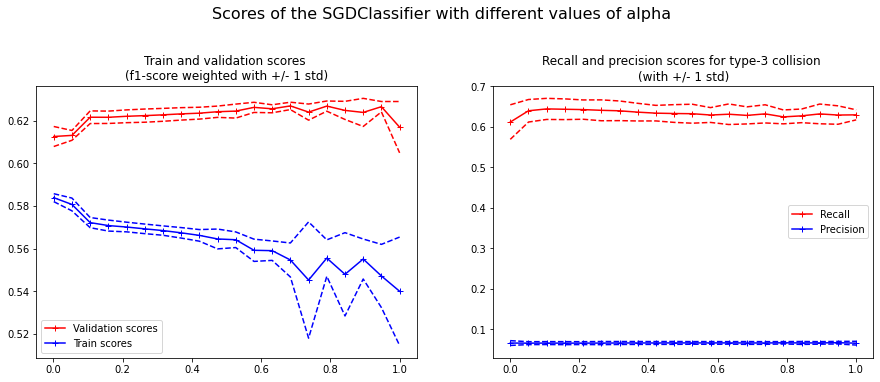

In [133]:
values_range=np.linspace(0.001, 1, 20) 

val_scores, recall_scores, CM = print_scores(
    SGDClassifier(loss='log', class_weight=None), 
    'alpha', 
    values_range, 
    X, y,
)

In [134]:
ind_opt=3

print('Best value for the hyperparameter: {}'.format(values_range[ind_opt]))
print('Corresponding validation score: {}%'.format(round(val_scores[ind_opt]*100,2)))
print('Corresponding recall score for the type-3 collision: {}%'.format(round(recall_scores[ind_opt]*100,2)))
print('Corresponding confusion matrix: \n{}'.format(CM[ind_opt]))

Best value for the hyperparameter: 0.15873684210526315
Corresponding validation score: 62.15%
Corresponding recall score for the type-3 collision: 64.37%
Corresponding confusion matrix: 
[[11503  4963  2008]
 [ 2074  3594  2379]
 [   52   112   286]]


#### Showing the corresponding features weights

In [135]:
sgdc=SGDClassifier(alpha=0.16, loss='log')
X_bal, y_bal = balanced(X,y)
sgdc.fit(X_bal, y_bal)

SGDClassifier(alpha=0.16, loss='log')

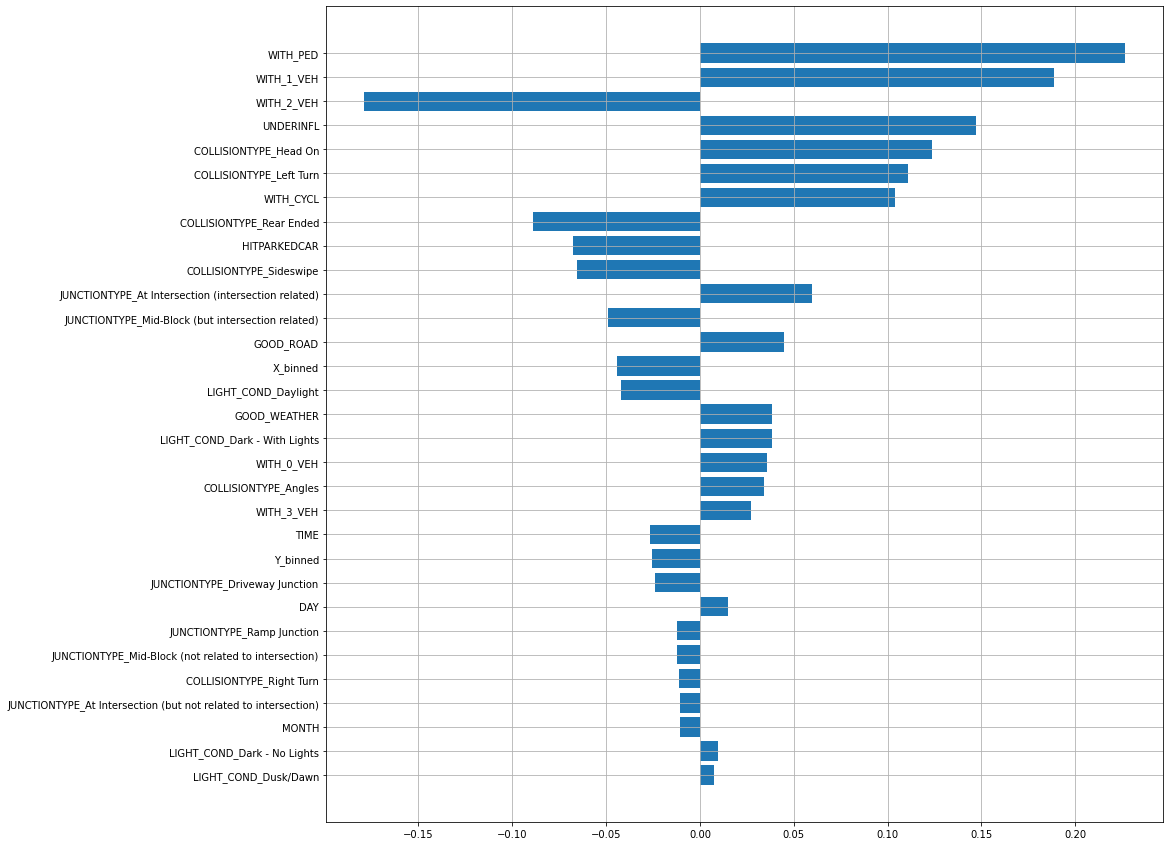

In [136]:
coef=sgdc.coef_[2,:]

M=[(f, c) for f,c in zip(features, coef)]
M_sort=sorted(M, key=lambda x: abs(x[1]))

f, c = [m[0] for m in M_sort], [m[1] for m in M_sort]

fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.barh(f, c)
ax.grid()

### Decision Tree

#### Finding the best hyperparameter

##### max_leaf_nodes

Starting jobs at 2020-09-24 11:22:47...
	 Job 1 -- Sub-Job 1
	 Job 1 -- Sub-Job 2
	 Job 1 -- Sub-Job 3
	 Job 1 -- Sub-Job 4
	 Job 1 -- Sub-Job 5
	 Job 1 -- Sub-Job 6
Job 1 on 20, duration : 0 min 6 s
	 Job 2 -- Sub-Job 1
	 Job 2 -- Sub-Job 2
	 Job 2 -- Sub-Job 3
	 Job 2 -- Sub-Job 4
	 Job 2 -- Sub-Job 5
	 Job 2 -- Sub-Job 6
Job 2 on 20, duration : 0 min 6 s
	 Job 3 -- Sub-Job 1
	 Job 3 -- Sub-Job 2
	 Job 3 -- Sub-Job 3
	 Job 3 -- Sub-Job 4
	 Job 3 -- Sub-Job 5
	 Job 3 -- Sub-Job 6
Job 3 on 20, duration : 0 min 6 s
	 Job 4 -- Sub-Job 1
	 Job 4 -- Sub-Job 2
	 Job 4 -- Sub-Job 3
	 Job 4 -- Sub-Job 4
	 Job 4 -- Sub-Job 5
	 Job 4 -- Sub-Job 6
Job 4 on 20, duration : 0 min 6 s
	 Job 5 -- Sub-Job 1
	 Job 5 -- Sub-Job 2
	 Job 5 -- Sub-Job 3
	 Job 5 -- Sub-Job 4
	 Job 5 -- Sub-Job 5
	 Job 5 -- Sub-Job 6
Job 5 on 20, duration : 0 min 6 s
	 Job 6 -- Sub-Job 1
	 Job 6 -- Sub-Job 2
	 Job 6 -- Sub-Job 3
	 Job 6 -- Sub-Job 4
	 Job 6 -- Sub-Job 5
	 Job 6 -- Sub-Job 6
Job 6 on 20, duration : 0 min 6 s


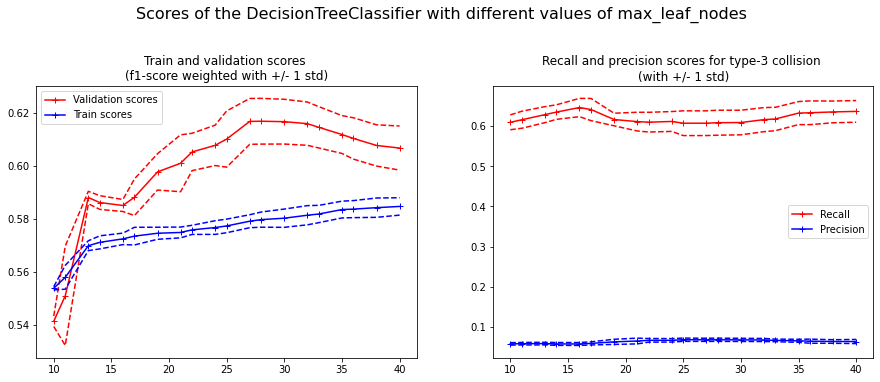

In [137]:
values_range=[int(i) for i in np.linspace(10, 40, 20)] 

val_scores, recall_scores, CM = print_scores(
    DecisionTreeClassifier(), 
    'max_leaf_nodes', 
    values_range, 
    X, y,
)

In [138]:
ind_opt=-9

print('Best value for the hyperparameter: {}'.format(values_range[ind_opt]))
print('Corresponding validation score: {}%'.format(round(val_scores[ind_opt]*100,2)))
print('Corresponding recall score for the type-3 collision: {}%'.format(round(recall_scores[ind_opt]*100,2)))
print('Corresponding confusion matrix: \n{}'.format(CM[ind_opt]))

Best value for the hyperparameter: 27
Corresponding validation score: 61.67%
Corresponding recall score for the type-3 collision: 60.72%
Corresponding confusion matrix: 
[[10563  5975  1936]
 [ 1497  4222  2328]
 [   49   127   274]]


##### max_depth

Starting jobs at 2020-09-24 11:25:06...
	 Job 1 -- Sub-Job 1
	 Job 1 -- Sub-Job 2
	 Job 1 -- Sub-Job 3
	 Job 1 -- Sub-Job 4
	 Job 1 -- Sub-Job 5
	 Job 1 -- Sub-Job 6
Job 1 on 10, duration : 0 min 6 s
	 Job 2 -- Sub-Job 1
	 Job 2 -- Sub-Job 2
	 Job 2 -- Sub-Job 3
	 Job 2 -- Sub-Job 4
	 Job 2 -- Sub-Job 5
	 Job 2 -- Sub-Job 6
Job 2 on 10, duration : 0 min 6 s
	 Job 3 -- Sub-Job 1
	 Job 3 -- Sub-Job 2
	 Job 3 -- Sub-Job 3
	 Job 3 -- Sub-Job 4
	 Job 3 -- Sub-Job 5
	 Job 3 -- Sub-Job 6
Job 3 on 10, duration : 0 min 6 s
	 Job 4 -- Sub-Job 1
	 Job 4 -- Sub-Job 2
	 Job 4 -- Sub-Job 3
	 Job 4 -- Sub-Job 4
	 Job 4 -- Sub-Job 5
	 Job 4 -- Sub-Job 6
Job 4 on 10, duration : 0 min 6 s
	 Job 5 -- Sub-Job 1
	 Job 5 -- Sub-Job 2
	 Job 5 -- Sub-Job 3
	 Job 5 -- Sub-Job 4
	 Job 5 -- Sub-Job 5
	 Job 5 -- Sub-Job 6
Job 5 on 10, duration : 0 min 6 s
	 Job 6 -- Sub-Job 1
	 Job 6 -- Sub-Job 2
	 Job 6 -- Sub-Job 3
	 Job 6 -- Sub-Job 4
	 Job 6 -- Sub-Job 5
	 Job 6 -- Sub-Job 6
Job 6 on 10, duration : 0 min 6 s


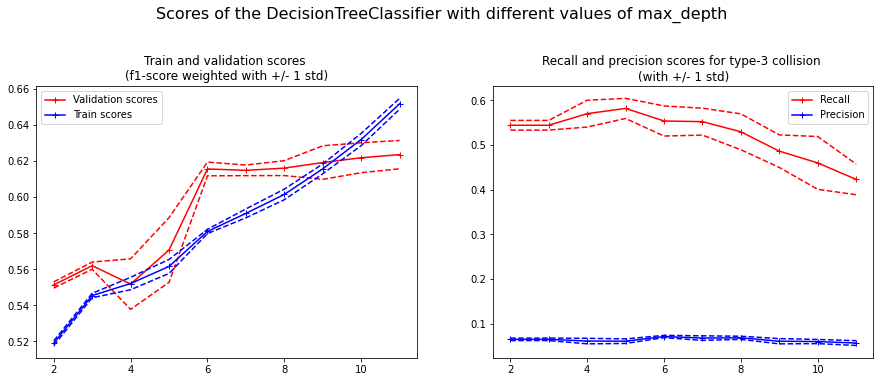

In [139]:
values_range=range(2,12)

val_scores, recall_scores, CM = print_scores(
    DecisionTreeClassifier(), 
    'max_depth', 
    values_range, 
    X, y
)

In [140]:
ind_opt=5

print('Best value for the hyperparameter: {}'.format(values_range[ind_opt]))
print('Corresponding validation score: {}%'.format(round(val_scores[ind_opt]*100,2)))
print('Corresponding recall score for the type-3 collision: {}%'.format(round(recall_scores[ind_opt]*100,2)))
print('Corresponding confusion matrix: \n{}'.format(CM[ind_opt]))

Best value for the hyperparameter: 7
Corresponding validation score: 61.48%
Corresponding recall score for the type-3 collision: 55.23%
Corresponding confusion matrix: 
[[10513  6349  1525]
 [ 1454  4591  2073]
 [   79   125   259]]


#### Drawing the corresponding tree

In [141]:
dtc=DecisionTreeClassifier(max_leaf_nodes=27)
X_bal, y_bal = balanced(X, y)
dtc.fit(X_bal, y_bal)

DecisionTreeClassifier(max_leaf_nodes=27)

In [142]:
dot_data=export_graphviz(
    dtc,
    out_file=None,
    feature_names=features,
    class_names=['1','2','3'],
    rounded=True,
    filled=True,
    proportion=True,
    impurity=False,
    precision=2,

)
#dot_data

To have a readable and understandable tree of decisions, I am modifying the `dot_data` to take into account the true values of the features, not the scaled ones.

---

Determining the -0.42 value in y_binned <= -0.42

In [143]:
y_binned=X[:,1]
y_binned_sort=np.unique(np.sort(y_binned))
I=np.array([i for i in range(len(y_binned_sort))])
y_binned_sort[(y_binned_sort<=-0.418) & (y_binned_sort>=-0.422)], \
I[(y_binned_sort<=-0.418) & (y_binned_sort>=-0.422)]

(array([-0.42105659, -0.41958056, -0.41810453]), array([1141, 1142, 1143]))

In [144]:
np.unique(np.sort(df_pipe['Y_binned'].values))[1142]

1228.0

Thus the value is 1228.

---

In [145]:
dot_data='digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="WITH_1_VEH = 0\\nsamples = 100.0%\\nvalue = [0.33, 0.33, 0.33]\\nclass = 1", fillcolor="#ffffff"] ;\n1 [label="JUNCTIONTYPE_Mid-Block (not related to intersection) = 0\\nsamples = 70.6%\\nvalue = [0.43, 0.35, 0.22]\\nclass = 1", fillcolor="#fcf0e8"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n3 [label="COLLISIONTYPE_Sideswipe = 0\\nsamples = 39.6%\\nvalue = [0.34, 0.42, 0.25]\\nclass = 2", fillcolor="#e8fcf0"] ;\n1 -> 3 ;\n15 [label="COLLISIONTYPE_Rear Ended = 0\\nsamples = 37.5%\\nvalue = [0.32, 0.43, 0.25]\\nclass = 2", fillcolor="#e0fbeb"] ;\n3 -> 15 ;\n19 [label="JUNCTIONTYPE_At Intersection (intersection related) = 0\\nsamples = 30.2%\\nvalue = [0.32, 0.4, 0.28]\\nclass = 2", fillcolor="#e9fcf1"] ;\n15 -> 19 ;\n21 [label="WITH_PED = 0\\nsamples = 5.8%\\nvalue = [0.49, 0.3, 0.21]\\nclass = 1", fillcolor="#f8ddca"] ;\n19 -> 21 ;\n37 [label="COLLISIONTYPE_Head On = 0\\nsamples = 5.6%\\nvalue = [0.5, 0.31, 0.19]\\nclass = 1", fillcolor="#f8dcc8"] ;\n21 -> 37 ;\n49 [label="samples = 5.4%\\nvalue = [0.52, 0.31, 0.18]\\nclass = 1", fillcolor="#f7d9c4"] ;\n37 -> 49 ;\n50 [label="samples = 0.3%\\nvalue = [0.18, 0.25, 0.57]\\nclass = 3", fillcolor="#caacf4"] ;\n37 -> 50 ;\n38 [label="samples = 0.1%\\nvalue = [0.01, 0.1, 0.89]\\nclass = 3", fillcolor="#9152e8"] ;\n21 -> 38 ;\n22 [label="UNDERINFL = 0\\nsamples = 24.4%\\nvalue = [0.28, 0.42, 0.3]\\nclass = 2", fillcolor="#defbea"] ;\n19 -> 22 ;\n23 [label="WITH_PED = 0\\nsamples = 23.0%\\nvalue = [0.29, 0.43, 0.28]\\nclass = 2", fillcolor="#d9fae7"] ;\n22 -> 23 ;\n33 [label="COLLISIONTYPE_Angles = 0\\nsamples = 22.7%\\nvalue = [0.3, 0.43, 0.27]\\nclass = 2", fillcolor="#d9fae7"] ;\n23 -> 33 ;\n39 [label="COLLISIONTYPE_Left Turn = 0\\nsamples = 8.3%\\nvalue = [0.3, 0.37, 0.33]\\nclass = 2", fillcolor="#f4fdf8"] ;\n33 -> 39 ;\n41 [label="WITH_CYCL = 0\\nsamples = 1.8%\\nvalue = [0.46, 0.27, 0.26]\\nclass = 1", fillcolor="#f8decb"] ;\n39 -> 41 ;\n51 [label="samples = 1.6%\\nvalue = [0.5, 0.28, 0.22]\\nclass = 1", fillcolor="#f7d9c3"] ;\n41 -> 51 ;\n52 [label="samples = 0.1%\\nvalue = [0.0, 0.23, 0.77]\\nclass = 3", fillcolor="#a673ed"] ;\n41 -> 52 ;\n42 [label="samples = 6.6%\\nvalue = [0.26, 0.39, 0.35]\\nclass = 2", fillcolor="#f1fdf6"] ;\n39 -> 42 ;\n40 [label="samples = 14.4%\\nvalue = [0.29, 0.47, 0.24]\\nclass = 2", fillcolor="#cef9e0"] ;\n33 -> 40 ;\n34 [label="samples = 0.3%\\nvalue = [0.01, 0.22, 0.77]\\nclass = 3", fillcolor="#a673ed"] ;\n23 -> 34 ;\n24 [label="samples = 1.4%\\nvalue = [0.1, 0.26, 0.64]\\nclass = 3", fillcolor="#be98f1"] ;\n22 -> 24 ;\n20 [label="samples = 7.3%\\nvalue = [0.32, 0.56, 0.12]\\nclass = 2", fillcolor="#b9f6d3"] ;\n15 -> 20 ;\n16 [label="samples = 2.1%\\nvalue = [0.68, 0.21, 0.11]\\nclass = 1", fillcolor="#f0b58b"] ;\n3 -> 16 ;\n4 [label="COLLISIONTYPE_Rear Ended = 0\\nsamples = 31.0%\\nvalue = [0.55, 0.27, 0.18]\\nclass = 1", fillcolor="#f5d0b5"] ;\n1 -> 4 ;\n5 [label="COLLISIONTYPE_Head On = 0\\nsamples = 22.8%\\nvalue = [0.63, 0.18, 0.19]\\nclass = 1", fillcolor="#f1bb94"] ;\n4 -> 5 ;\n7 [label="WITH_2_VEH = 0\\nsamples = 21.4%\\nvalue = [0.66, 0.17, 0.16]\\nclass = 1", fillcolor="#f0b58a"] ;\n5 -> 7 ;\n9 [label="WITH_CYCL = 0\\nsamples = 3.2%\\nvalue = [0.37, 0.26, 0.37]\\nclass = 3", fillcolor="#ffffff"] ;\n7 -> 9 ;\n31 [label="samples = 2.9%\\nvalue = [0.41, 0.27, 0.32]\\nclass = 1", fillcolor="#fceee5"] ;\n9 -> 31 ;\n32 [label="samples = 0.3%\\nvalue = [0.0, 0.17, 0.83]\\nclass = 3", fillcolor="#9b62ea"] ;\n9 -> 32 ;\n10 [label="WITH_PED = 0\\nsamples = 18.2%\\nvalue = [0.71, 0.16, 0.13]\\nclass = 1", fillcolor="#eeac7d"] ;\n7 -> 10 ;\n17 [label="COLLISIONTYPE_Left Turn = 0\\nsamples = 17.9%\\nvalue = [0.73, 0.16, 0.11]\\nclass = 1", fillcolor="#edaa7a"] ;\n10 -> 17 ;\n25 [label="UNDERINFL = 0\\nsamples = 17.2%\\nvalue = [0.74, 0.15, 0.11]\\nclass = 1", fillcolor="#eda775"] ;\n17 -> 25 ;\n27 [label="COLLISIONTYPE_Angles = 0\\nsamples = 16.3%\\nvalue = [0.76, 0.15, 0.09]\\nclass = 1", fillcolor="#eca471"] ;\n25 -> 27 ;\n29 [label="Y_binned <= 1228\\nsamples = 15.4%\\nvalue = [0.78, 0.13, 0.09]\\nclass = 1", fillcolor="#eca16b"] ;\n27 -> 29 ;\n35 [label="samples = 5.0%\\nvalue = [0.69, 0.17, 0.15]\\nclass = 1", fillcolor="#efb083"] ;\n29 -> 35 ;\n36 [label="samples = 10.5%\\nvalue = [0.82, 0.12, 0.06]\\nclass = 1", fillcolor="#ea9a61"] ;\n29 -> 36 ;\n30 [label="samples = 0.9%\\nvalue = [0.43, 0.4, 0.16]\\nclass = 1", fillcolor="#fef9f5"] ;\n27 -> 30 ;\n28 [label="samples = 0.9%\\nvalue = [0.41, 0.24, 0.35]\\nclass = 1", fillcolor="#fcf3eb"] ;\n25 -> 28 ;\n26 [label="samples = 0.7%\\nvalue = [0.3, 0.35, 0.35]\\nclass = 3", fillcolor="#ffffff"] ;\n17 -> 26 ;\n18 [label="samples = 0.3%\\nvalue = [0.0, 0.17, 0.83]\\nclass = 3", fillcolor="#9b61ea"] ;\n10 -> 18 ;\n8 [label="samples = 1.4%\\nvalue = [0.13, 0.27, 0.6]\\nclass = 3", fillcolor="#c5a4f3"] ;\n5 -> 8 ;\n6 [label="WITH_3_VEH = 0\\nsamples = 8.2%\\nvalue = [0.31, 0.53, 0.16]\\nclass = 2", fillcolor="#bff7d6"] ;\n4 -> 6 ;\n47 [label="samples = 6.0%\\nvalue = [0.35, 0.52, 0.13]\\nclass = 2", fillcolor="#cdf8df"] ;\n6 -> 47 ;\n48 [label="samples = 2.2%\\nvalue = [0.19, 0.58, 0.23]\\nclass = 2", fillcolor="#a5f3c6"] ;\n6 -> 48 ;\n2 [label="WITH_PED = 0\\nsamples = 29.4%\\nvalue = [0.1, 0.29, 0.61]\\nclass = 3", fillcolor="#c6a5f3"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n11 [label="WITH_CYCL = 0\\nsamples = 16.0%\\nvalue = [0.18, 0.3, 0.52]\\nclass = 3", fillcolor="#d8c2f7"] ;\n2 -> 11 ;\n13 [label="UNDERINFL = 0\\nsamples = 9.1%\\nvalue = [0.29, 0.23, 0.47]\\nclass = 3", fillcolor="#dfcdf8"] ;\n11 -> 13 ;\n45 [label="samples = 7.1%\\nvalue = [0.33, 0.24, 0.44]\\nclass = 3", fillcolor="#eadefb"] ;\n13 -> 45 ;\n46 [label="samples = 1.9%\\nvalue = [0.18, 0.22, 0.6]\\nclass = 3", fillcolor="#c29ff2"] ;\n13 -> 46 ;\n14 [label="samples = 6.9%\\nvalue = [0.03, 0.39, 0.58]\\nclass = 3", fillcolor="#d8c2f7"] ;\n11 -> 14 ;\n12 [label="JUNCTIONTYPE_Mid-Block (not related to intersection) = 0\\nsamples = 13.4%\\nvalue = [0.02, 0.26, 0.72]\\nclass = 3", fillcolor="#b184ef"] ;\n2 -> 12 ;\n43 [label="samples = 9.2%\\nvalue = [0.02, 0.3, 0.68]\\nclass = 3", fillcolor="#ba93f1"] ;\n12 -> 43 ;\n44 [label="samples = 4.3%\\nvalue = [0.01, 0.18, 0.81]\\nclass = 3", fillcolor="#9f68eb"] ;\n12 -> 44 ;\n}'

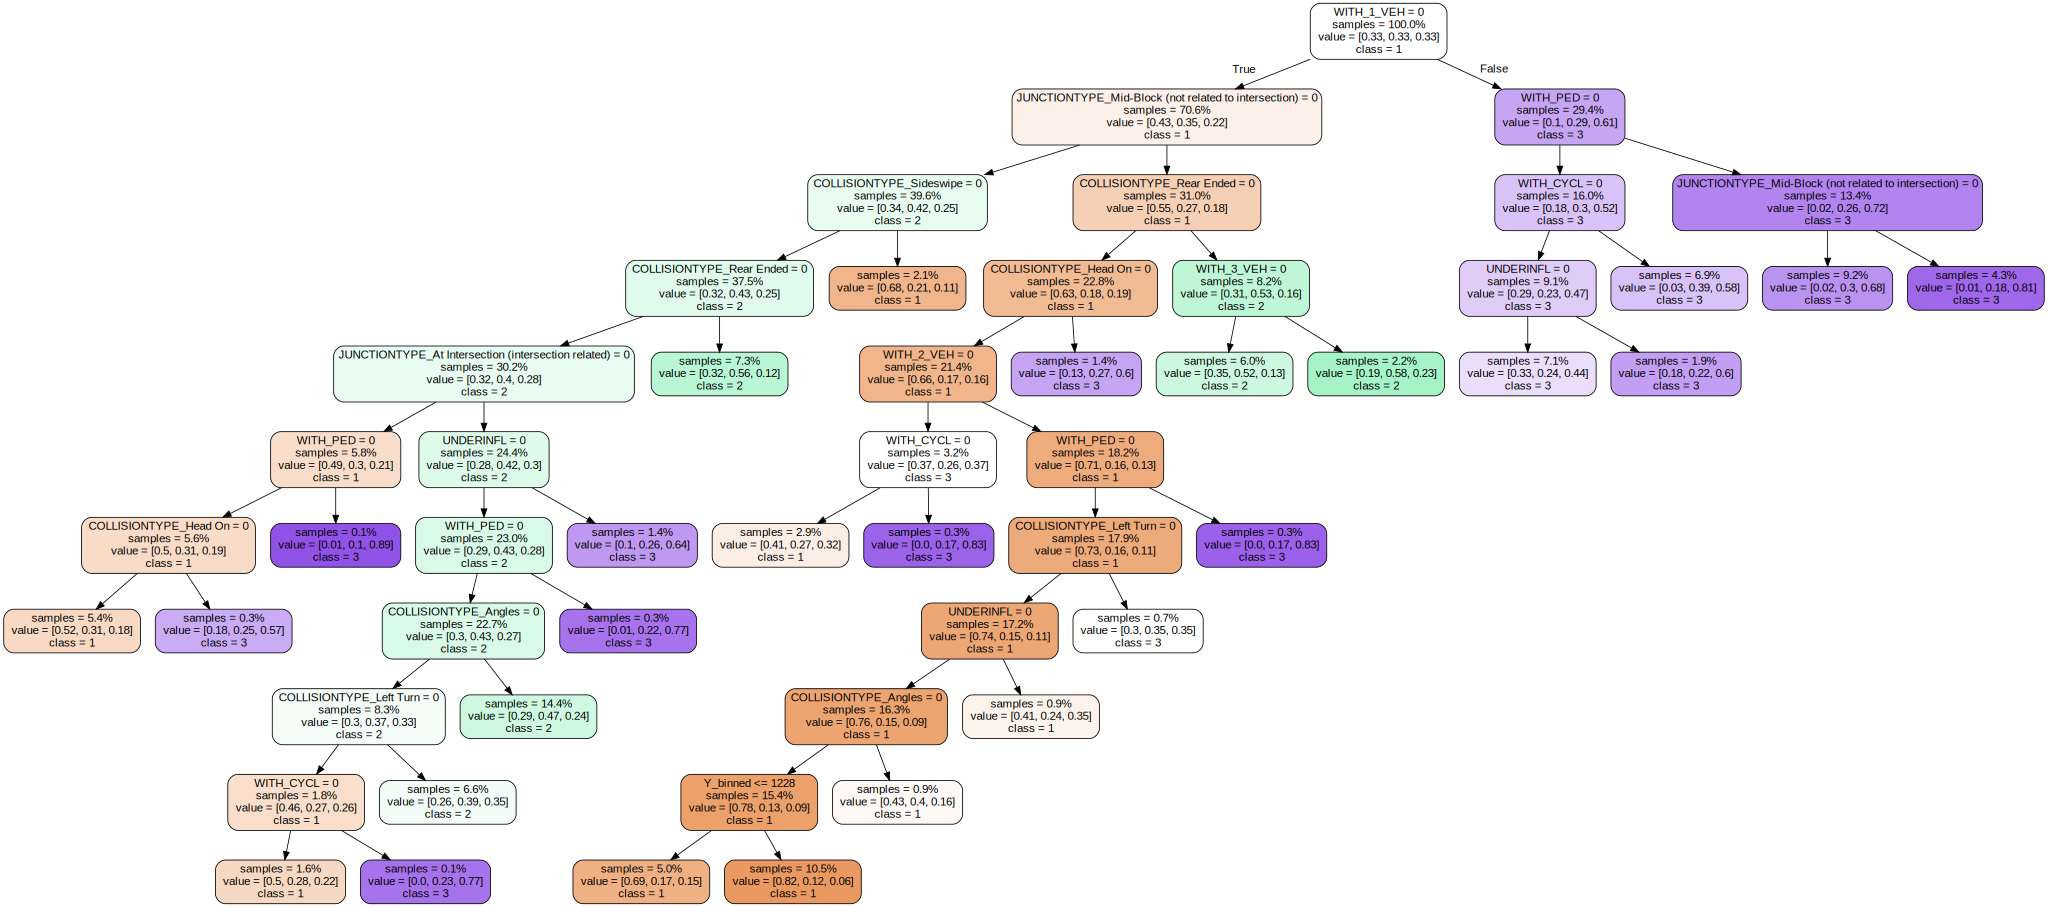

In [146]:
graph=graphviz.Source(dot_data)
#graph.render('tree_old') ## to export it in pdf
graph

<BarContainer object of 31 artists>

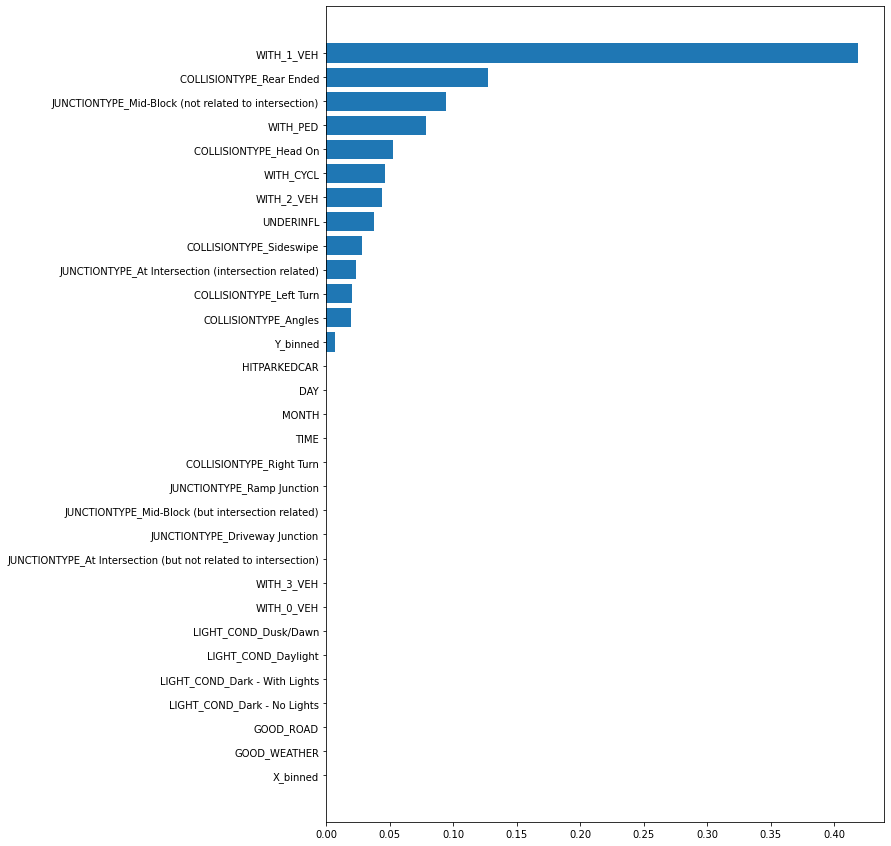

In [147]:
M = sorted([(f, fi) for f,fi in zip(features,dtc.feature_importances_)], key=lambda x: x[1])

f, fi = [m[0] for m in M], [m[1] for m in M]

fig, ax = plt.subplots(1,1, figsize=(10,15))
ax.barh(f, fi)

### Random Forest

Starting jobs at 2020-09-24 11:26:16...
	 Job 1 -- Sub-Job 1
	 Job 1 -- Sub-Job 2
	 Job 1 -- Sub-Job 3
	 Job 1 -- Sub-Job 4
	 Job 1 -- Sub-Job 5
	 Job 1 -- Sub-Job 6
Job 1 on 10, duration : 0 min 27 s
	 Job 2 -- Sub-Job 1
	 Job 2 -- Sub-Job 2
	 Job 2 -- Sub-Job 3
	 Job 2 -- Sub-Job 4
	 Job 2 -- Sub-Job 5
	 Job 2 -- Sub-Job 6
Job 2 on 10, duration : 0 min 28 s
	 Job 3 -- Sub-Job 1
	 Job 3 -- Sub-Job 2
	 Job 3 -- Sub-Job 3
	 Job 3 -- Sub-Job 4
	 Job 3 -- Sub-Job 5
	 Job 3 -- Sub-Job 6
Job 3 on 10, duration : 0 min 28 s
	 Job 4 -- Sub-Job 1
	 Job 4 -- Sub-Job 2
	 Job 4 -- Sub-Job 3
	 Job 4 -- Sub-Job 4
	 Job 4 -- Sub-Job 5
	 Job 4 -- Sub-Job 6
Job 4 on 10, duration : 0 min 28 s
	 Job 5 -- Sub-Job 1
	 Job 5 -- Sub-Job 2
	 Job 5 -- Sub-Job 3
	 Job 5 -- Sub-Job 4
	 Job 5 -- Sub-Job 5
	 Job 5 -- Sub-Job 6
Job 5 on 10, duration : 0 min 29 s
	 Job 6 -- Sub-Job 1
	 Job 6 -- Sub-Job 2
	 Job 6 -- Sub-Job 3
	 Job 6 -- Sub-Job 4
	 Job 6 -- Sub-Job 5
	 Job 6 -- Sub-Job 6
Job 6 on 10, duration : 0 min

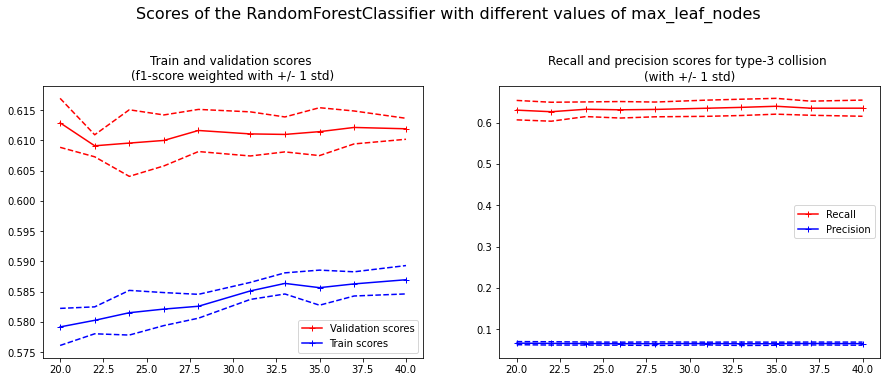

In [148]:
nrange=[int(i) for i in np.linspace(20, 40, 10)]

val_scores, recall_scores, CM = print_scores(
    RandomForestClassifier(), 
    'max_leaf_nodes', 
    nrange, 
    X, y
)

In [149]:
ind_opt=-5

print('Best value for the hyperparameter: {}'.format(nrange[ind_opt]))
print('Corresponding validation score: {}%'.format(round(val_scores[ind_opt]*100,2)))
print('Corresponding recall score for the type-3 collision: {}%'.format(round(recall_scores[ind_opt]*100,2)))
print('Corresponding confusion matrix: \n{}'.format(CM[ind_opt]))

Best value for the hyperparameter: 31
Corresponding validation score: 61.11%
Corresponding recall score for the type-3 collision: 63.49%
Corresponding confusion matrix: 
[[10451  6022  1914]
 [ 1393  4421  2304]
 [   61   107   295]]


### Extra Trees classifier

Starting jobs at 2020-09-24 11:31:09...
	 Job 1 -- Sub-Job 1
	 Job 1 -- Sub-Job 2
	 Job 1 -- Sub-Job 3
	 Job 1 -- Sub-Job 4
	 Job 1 -- Sub-Job 5
	 Job 1 -- Sub-Job 6
Job 1 on 10, duration : 0 min 27 s
	 Job 2 -- Sub-Job 1
	 Job 2 -- Sub-Job 2
	 Job 2 -- Sub-Job 3
	 Job 2 -- Sub-Job 4
	 Job 2 -- Sub-Job 5
	 Job 2 -- Sub-Job 6
Job 2 on 10, duration : 0 min 27 s
	 Job 3 -- Sub-Job 1
	 Job 3 -- Sub-Job 2
	 Job 3 -- Sub-Job 3
	 Job 3 -- Sub-Job 4
	 Job 3 -- Sub-Job 5
	 Job 3 -- Sub-Job 6
Job 3 on 10, duration : 0 min 28 s
	 Job 4 -- Sub-Job 1
	 Job 4 -- Sub-Job 2
	 Job 4 -- Sub-Job 3
	 Job 4 -- Sub-Job 4
	 Job 4 -- Sub-Job 5
	 Job 4 -- Sub-Job 6
Job 4 on 10, duration : 0 min 28 s
	 Job 5 -- Sub-Job 1
	 Job 5 -- Sub-Job 2
	 Job 5 -- Sub-Job 3
	 Job 5 -- Sub-Job 4
	 Job 5 -- Sub-Job 5
	 Job 5 -- Sub-Job 6
Job 5 on 10, duration : 0 min 28 s
	 Job 6 -- Sub-Job 1
	 Job 6 -- Sub-Job 2
	 Job 6 -- Sub-Job 3
	 Job 6 -- Sub-Job 4
	 Job 6 -- Sub-Job 5
	 Job 6 -- Sub-Job 6
Job 6 on 10, duration : 0 min

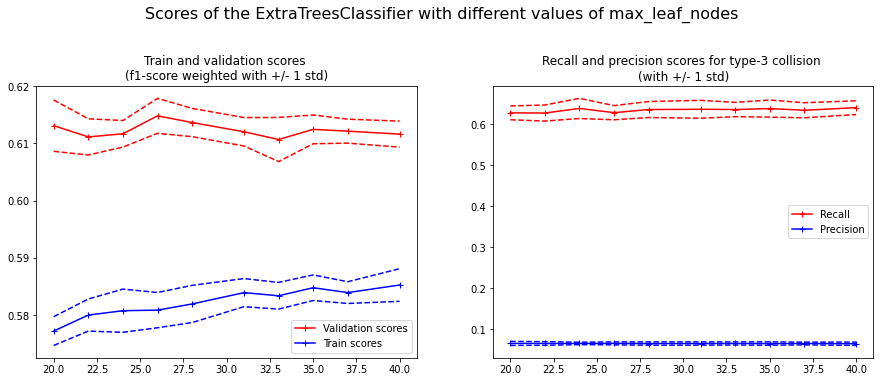

In [150]:
nrange=[int(i) for i in np.linspace(20, 40, 10)]

val_scores, recall_scores, CM = print_scores(
    ExtraTreesClassifier(), 
    'max_leaf_nodes', 
    nrange, 
    X, y
)

In [151]:
ind_opt=3

print('Best value for the hyperparameter: {}'.format(nrange[ind_opt]))
print('Corresponding validation score: {}%'.format(round(val_scores[ind_opt]*100,2)))
print('Corresponding recall score for the type-3 collision: {}%'.format(round(recall_scores[ind_opt]*100,2)))
print('Corresponding confusion matrix: \n{}'.format(CM[ind_opt]))

Best value for the hyperparameter: 26
Corresponding validation score: 61.48%
Corresponding recall score for the type-3 collision: 62.78%
Corresponding confusion matrix: 
[[10455  6094  1878]
 [ 1472  4262  2324]
 [   73   101   309]]


### Logistic regression

Starting jobs at 2020-09-24 11:35:57...
	 Job 1 -- Sub-Job 1
	 Job 1 -- Sub-Job 2
	 Job 1 -- Sub-Job 3
	 Job 1 -- Sub-Job 4
	 Job 1 -- Sub-Job 5
	 Job 1 -- Sub-Job 6
Job 1 on 10, duration : 0 min 14 s
	 Job 2 -- Sub-Job 1
	 Job 2 -- Sub-Job 2
	 Job 2 -- Sub-Job 3
	 Job 2 -- Sub-Job 4
	 Job 2 -- Sub-Job 5
	 Job 2 -- Sub-Job 6
Job 2 on 10, duration : 0 min 15 s
	 Job 3 -- Sub-Job 1
	 Job 3 -- Sub-Job 2
	 Job 3 -- Sub-Job 3
	 Job 3 -- Sub-Job 4
	 Job 3 -- Sub-Job 5
	 Job 3 -- Sub-Job 6
Job 3 on 10, duration : 0 min 15 s
	 Job 4 -- Sub-Job 1
	 Job 4 -- Sub-Job 2
	 Job 4 -- Sub-Job 3
	 Job 4 -- Sub-Job 4
	 Job 4 -- Sub-Job 5
	 Job 4 -- Sub-Job 6
Job 4 on 10, duration : 0 min 17 s
	 Job 5 -- Sub-Job 1
	 Job 5 -- Sub-Job 2
	 Job 5 -- Sub-Job 3
	 Job 5 -- Sub-Job 4
	 Job 5 -- Sub-Job 5
	 Job 5 -- Sub-Job 6
Job 5 on 10, duration : 0 min 18 s
	 Job 6 -- Sub-Job 1
	 Job 6 -- Sub-Job 2
	 Job 6 -- Sub-Job 3
	 Job 6 -- Sub-Job 4
	 Job 6 -- Sub-Job 5
	 Job 6 -- Sub-Job 6
Job 6 on 10, duration : 0 min

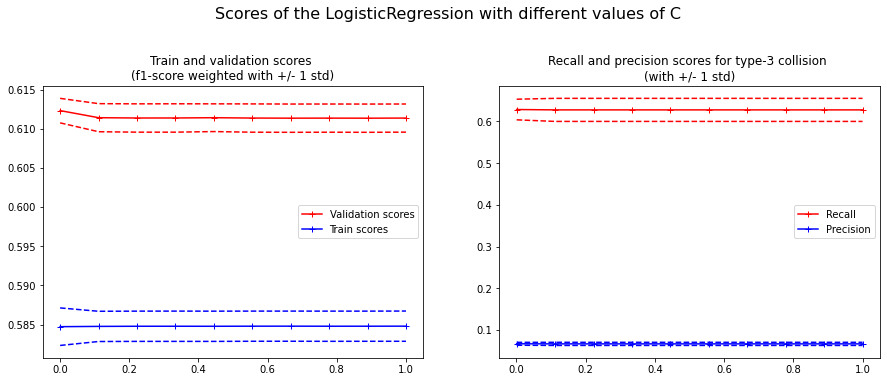

In [152]:
Crange=[i for i in np.linspace(0.001, 1, 10)]

val_scores, recall_scores, CM = print_scores(
    LogisticRegression(n_jobs=-1), 
    'C', 
    Crange, 
    X, y
)

In [153]:
ind_opt=2

print('Best value for the hyperparameter: {}'.format(Crange[ind_opt]))
print('Corresponding validation score: {}%'.format(round(val_scores[ind_opt]*100,2)))
print('Corresponding recall score for the type-3 collision: {}%'.format(round(recall_scores[ind_opt]*100,2)))
print('Corresponding confusion matrix: \n{}'.format(CM[ind_opt]))

Best value for the hyperparameter: 0.223
Corresponding validation score: 61.14%
Corresponding recall score for the type-3 collision: 62.78%
Corresponding confusion matrix: 
[[10431  6274  1682]
 [ 1347  4489  2282]
 [   65   112   286]]


### K-nearest neighbors

In [ ]:
nrange=[int(i) for i in np.linspace(5, 40, 10)]

val_scores, recall_scores, CM = print_scores(
    KNeighborsClassifier(n_jobs=-1), 
    'n_neighbors', 
    nrange, 
    X, y
)

In [ ]:
ind_opt=5

print('Best value for the hyperparameter: {}'.format(Crange[ind_opt]))
print('Corresponding validation score: {}%'.format(round(val_scores[ind_opt]*100,2)))
print('Corresponding recall score for the type-3 collision: {}%'.format(round(recall_scores[ind_opt]*100,2)))
print('Corresponding confusion matrix: \n{}'.format(CM[ind_opt]))

### Voting model

Starting jobs at 2020-09-24 11:38:51...
	 Job 1 -- Sub-Job 1
	 Job 1 -- Sub-Job 2
	 Job 1 -- Sub-Job 3
	 Job 1 -- Sub-Job 4
	 Job 1 -- Sub-Job 5
	 Job 1 -- Sub-Job 6
Job 1 on 2, duration : 0 min 34 s
	 Job 2 -- Sub-Job 1
	 Job 2 -- Sub-Job 2
	 Job 2 -- Sub-Job 3
	 Job 2 -- Sub-Job 4
	 Job 2 -- Sub-Job 5
	 Job 2 -- Sub-Job 6
Job 2 on 2, duration : 0 min 37 s
Total duration: 1 min 12 s


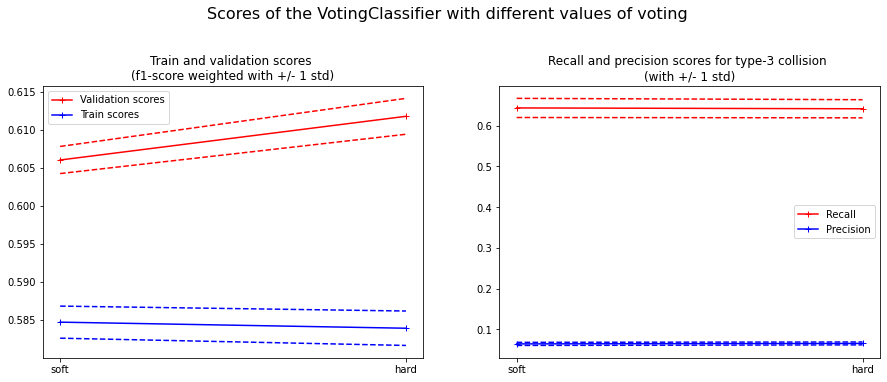

In [154]:
lrc=LogisticRegression(C=0.22)
ext=ExtraTreesClassifier(max_leaf_nodes=26)
sgdc=SGDClassifier(alpha=0.16, loss='log')

vc=VotingClassifier(
    estimators=[('lrc', lrc), ('ext', ext), ('sgdc', sgdc)],
    voting='soft'
)

val_scores, recall_scores, CM = print_scores(vc, 'voting', ['soft', 'hard'], X, y)


In [155]:
ind_opt=1

print('Best value for the hyperparameter: {}'.format(['soft', 'hard'][ind_opt]))
print('Corresponding validation score: {}%'.format(round(val_scores[ind_opt]*100,2)))
print('Corresponding recall score for the type-3 collision: {}%'.format(round(recall_scores[ind_opt]*100,2)))
print('Corresponding confusion matrix: \n{}'.format(CM[ind_opt]))

Best value for the hyperparameter: hard
Corresponding validation score: 61.18%
Corresponding recall score for the type-3 collision: 64.16%
Corresponding confusion matrix: 
[[10477  6038  1872]
 [ 1395  4415  2308]
 [   62   107   294]]


## Model evaluation

In [156]:
X_test, y_test =pipeline_scaled.fit_transform(df_test)

In [157]:
X_test.shape, y_test.shape

((33863, 31), (33863,))

### of the best model: SGDClassifier

In [158]:
sgdc=SGDClassifier(alpha=0.16, loss='log')
X_bal, y_bal = balanced(X,y)
sgdc.fit(X_bal, y_bal)
y_testpred=sgdc.predict(X_test)

print('Corresponding validation score: {}%'.format(round(f1_score(y_test, y_testpred, average='weighted')*100,2)))
print('Corresponding recall score for the type-3 collision: {}%'.format(round(recall_score(y_test, y_testpred, average=None, zero_division=0)[0]*100,2)))
print('Corresponding confusion matrix: \n{}'.format(confusion_matrix(y_test, y_testpred)))

Corresponding validation score: 62.3%
Corresponding recall score for the type-3 collision: 63.0%
Corresponding confusion matrix: 
[[14609  6109  2471]
 [ 2694  4466  2920]
 [   87   135   372]]


### for the DecisionTree

In [159]:
dtc=DecisionTreeClassifier(max_leaf_nodes=27)
X_bal, y_bal = balanced(X, y)
dtc.fit(X_bal, y_bal)
y_testpred=dtc.predict(X_test)

print('Corresponding validation score: {}%'.format(round(f1_score(y_test, y_testpred, average='weighted')*100,2)))
print('Corresponding recall score for the type-3 collision: {}%'.format(round(recall_score(y_test, y_testpred, average=None, zero_division=0)[0]*100,2)))
print('Corresponding confusion matrix: \n{}'.format(confusion_matrix(y_test, y_testpred)))

Corresponding validation score: 61.0%
Corresponding recall score for the type-3 collision: 57.21%
Corresponding confusion matrix: 
[[13267  7423  2499]
 [ 1959  5225  2896]
 [   88   140   366]]
